In [1]:
!pip install --upgrade pip setuptools wheel
!pip install Cython numpy pandas


In [2]:
!pip install pandas numpy matplotlib seaborn plotly statsmodels scikit-learn xgboost prophet


In [24]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
import warnings
from statsmodels.tsa.seasonal import STL
from prophet import Prophet
from xgboost import XGBRegressor
from statsmodels.tsa.stattools import adfuller, kpss


warnings.filterwarnings("ignore")

# Time Series & Stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose, STL

# ML Models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Forecasting
from prophet import Prophet

# Display Setup
plt.style.use('seaborn')
pd.set_option('display.max_columns', None)


In [3]:
import pandas as pd

# Corrected file path and name
df = pd.read_csv("Mercedes.csv", parse_dates=["Date"])

# Sort and preview
df = df.sort_values("Date").reset_index(drop=True)
df.head()


Date       Open       High        Low      Close  Adj Close   Volume
0 2020-01-02  41.092484  41.845215  40.971882  41.566578  33.846729  2973654
1 2020-01-03  41.296261  41.362801  40.302322  40.813847  33.233799  4014262
2 2020-01-06  40.202515  40.593433  39.703465  40.593433  33.054317  3441396
3 2020-01-07  40.797215  41.208927  40.680767  40.917816  33.318455  2816618
4 2020-01-08  40.589275  41.167339  40.489468  41.146545  33.504704  2659070

In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1105 non-null   datetime64[ns]
 1   Open       1105 non-null   float64       
 2   High       1105 non-null   float64       
 3   Low        1105 non-null   float64       
 4   Close      1105 non-null   float64       
 5   Adj Close  1105 non-null   float64       
 6   Volume     1105 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 60.6 KB


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [35]:
import pandas as pd

# Load the dataset (make sure path and filename are correct)
df = pd.read_csv("Mercedes.csv", parse_dates=["Date"])

# Sort by date
df = df.sort_values("Date").reset_index(drop=True)

# Clean and enrich the data
df.dropna(inplace=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.strftime('%B')
df['Weekday'] = df['Date'].dt.day_name()
df['Daily_Return'] = df['Adj Close'].pct_change()
df['Volatility'] = df['High'] - df['Low']
df['Range_%'] = (df['High'] - df['Low']) / df['Open'] * 100
df['Log_Return'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
df['Rolling_STD_30'] = df['Daily_Return'].rolling(30).std()
df['Rolling_Mean_30'] = df['Adj Close'].rolling(30).mean()
df['HL_Spread'] = df['High'] - df['Low']
df['Open-Change'] = df['Adj Close'] - df['Open']
df['Rolling_Return_50'] = df['Daily_Return'].rolling(50).sum()
df['Cumulative'] = (1 + df['Daily_Return']).cumprod()
df['Peak'] = df['Cumulative'].cummax()
df['Drawdown'] = df['Cumulative'] / df['Peak'] - 1
df['Week'] = df['Date'].dt.isocalendar().week
df['Quarter'] = df['Date'].dt.quarter
df['Direction'] = np.where(df['Daily_Return'] > 0, 'Up', 'Down')
df['MA10'] = df['Adj Close'].rolling(10).mean()
df['MA20'] = df['Adj Close'].rolling(20).mean()

# Preview
df.head()


Date       Open       High        Low      Close  Adj Close   Volume  \
0 2020-01-02  41.092484  41.845215  40.971882  41.566578  33.846729  2973654   
1 2020-01-03  41.296261  41.362801  40.302322  40.813847  33.233799  4014262   
2 2020-01-06  40.202515  40.593433  39.703465  40.593433  33.054317  3441396   
3 2020-01-07  40.797215  41.208927  40.680767  40.917816  33.318455  2816618   
4 2020-01-08  40.589275  41.167339  40.489468  41.146545  33.504704  2659070   

   Year  Month Month_Name    Weekday  Daily_Return  Volatility   Range_%  \
0  2020      1    January   Thursday           NaN    0.873333  2.125286   
1  2020      1    January     Friday     -0.018109    1.060479  2.567978   
2  2020      1    January     Monday     -0.005401    0.889968  2.213712   
3  2020      1    January    Tuesday      0.007991    0.528160  1.294598   
4  2020      1    January  Wednesday      0.005590    0.677871  1.670074   

   Log_Return  Rolling_STD_30  Rolling_Mean_30  HL_Spread  Open-Change  \
0         NaN             NaN              NaN   0.873333    -7.245755   
1   -0.018275             NaN              NaN   1.060479    -8.062462   
2   -0.005415             NaN              NaN   0.889968    -7.148198   
3    0.007959             NaN              NaN   0.528160    -7.478760   
4    0.005574             NaN              NaN   0.677871    -7.084571   

   Rolling_Return_50  Cumulative      Peak  Drawdown  Week  Quarter Direction  \
0                NaN         NaN       NaN       NaN     1        1      Down   
1                NaN    0.981891  0.981891  0.000000     1        1      Down   
2                NaN    0.976588  0.981891 -0.005401     2        1      Down   
3                NaN    0.984392  0.984392  0.000000     2        1        Up   
4                NaN    0.989895  0.989895  0.000000     2        1        Up   

   MA10  MA20  
0   NaN   NaN  
1   NaN   NaN  
2   NaN   NaN  
3   NaN   NaN  
4   NaN   NaN

In [5]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.day_name()
df['Daily_Return'] = df['Adj Close'].pct_change()
df['Volatility'] = df['High'] - df['Low']
df['Range_%'] = (df['High'] - df['Low']) / df['Open'] * 100


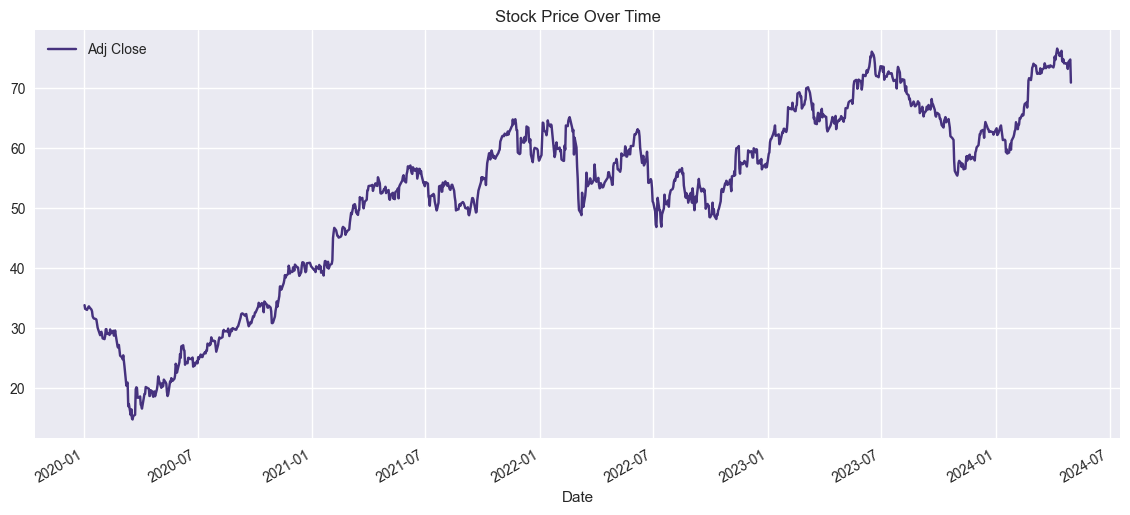

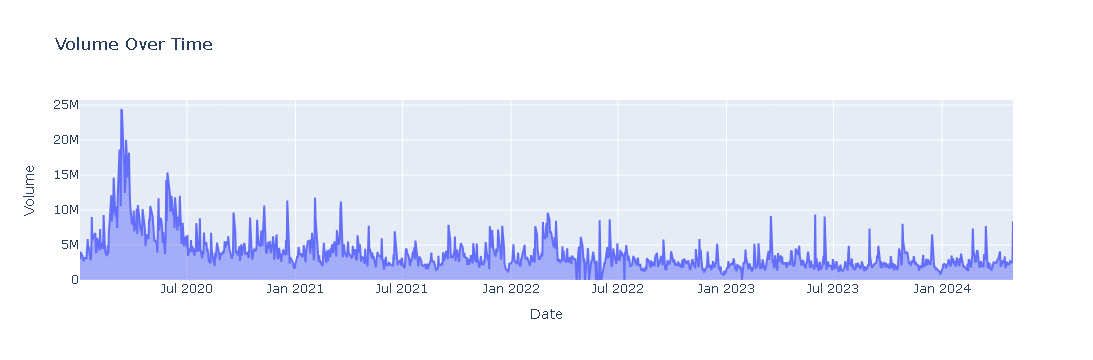

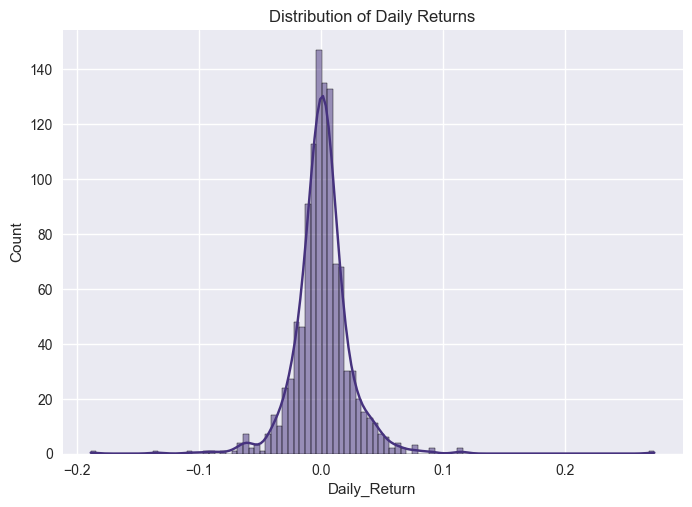

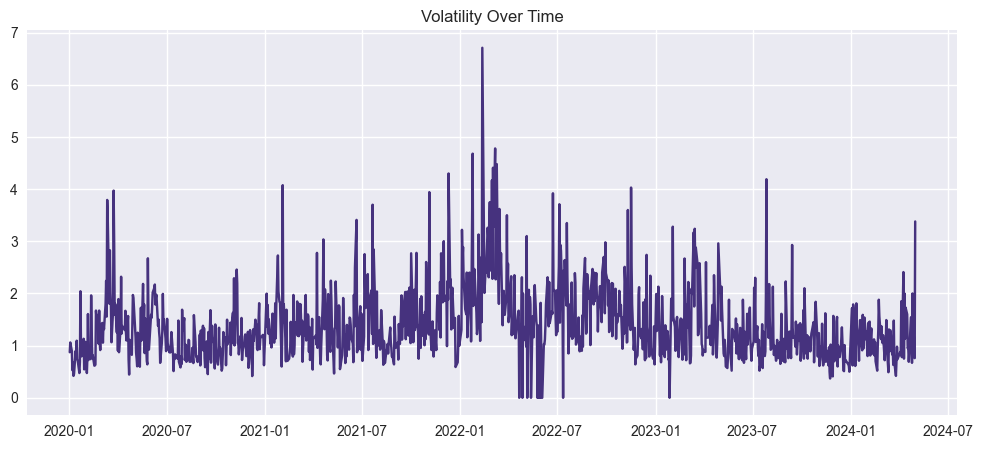

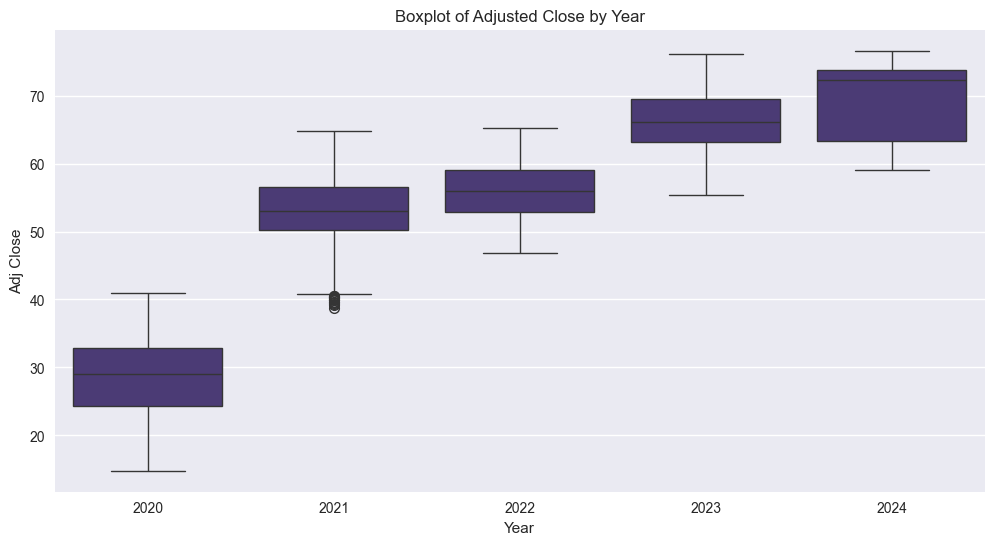

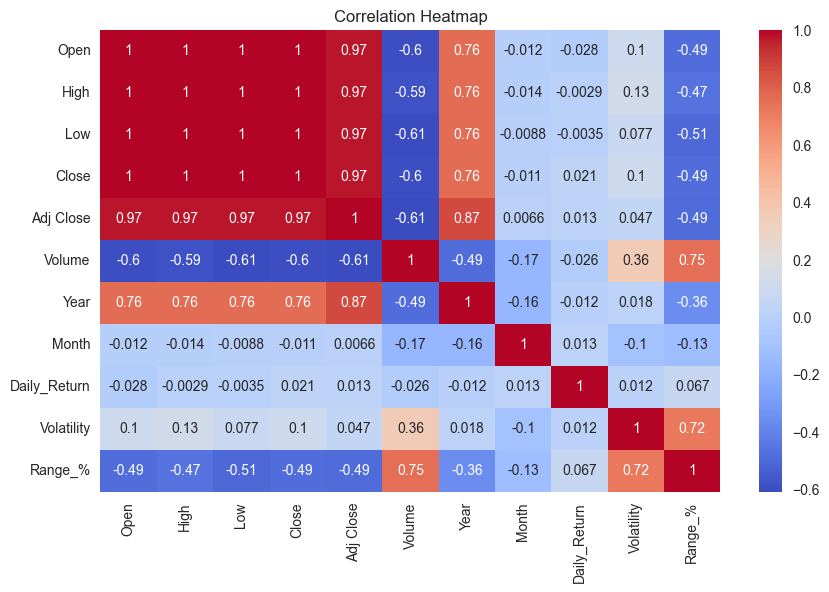

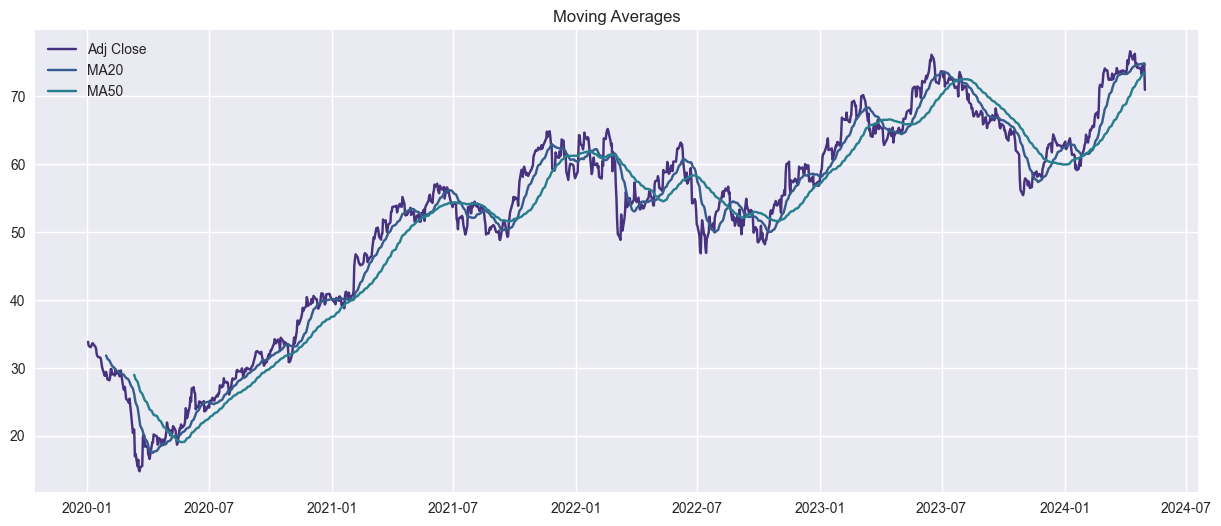

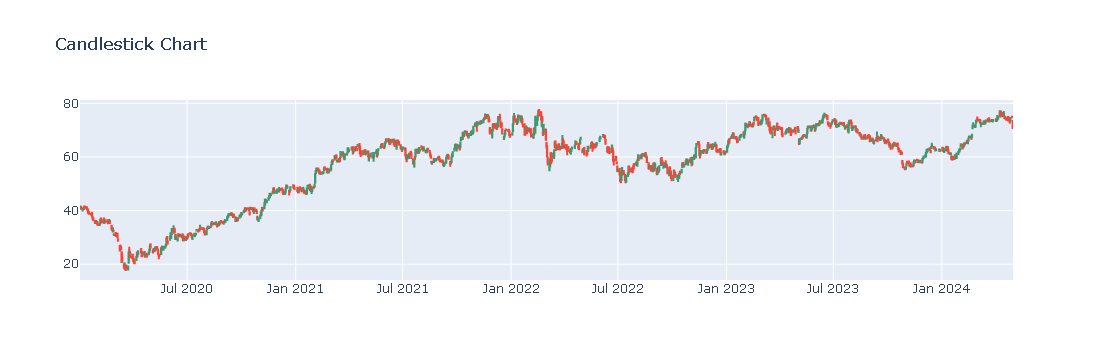

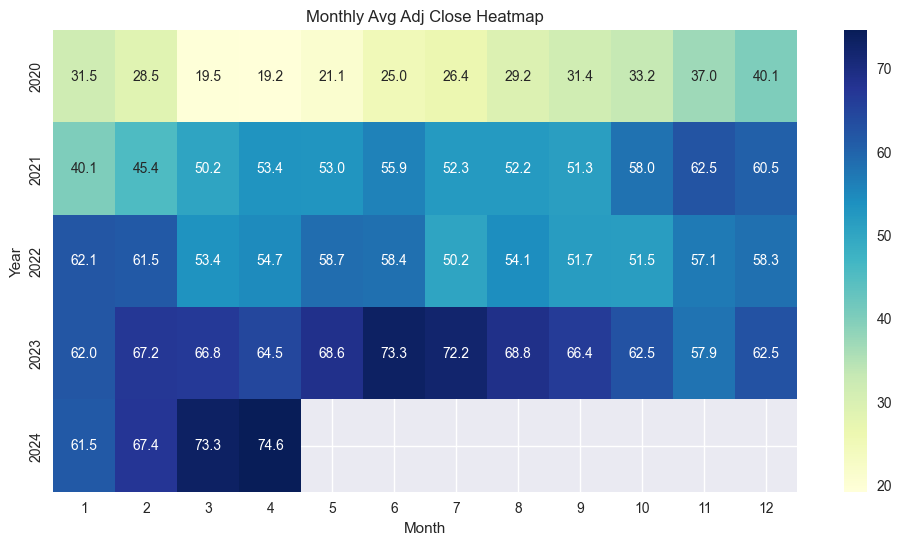

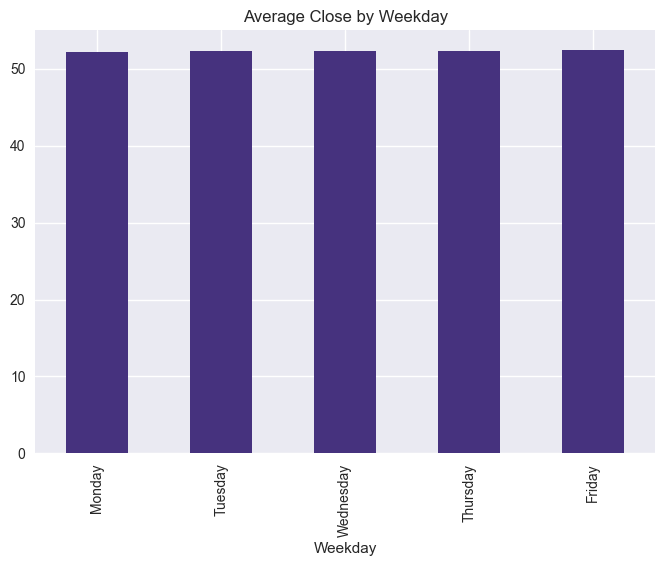

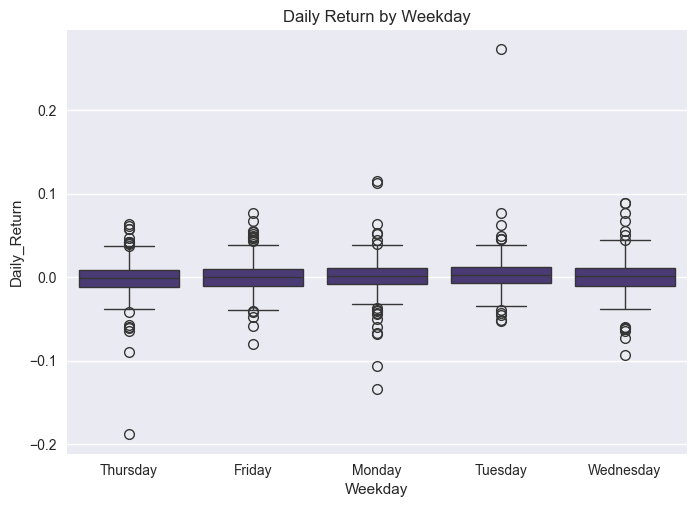

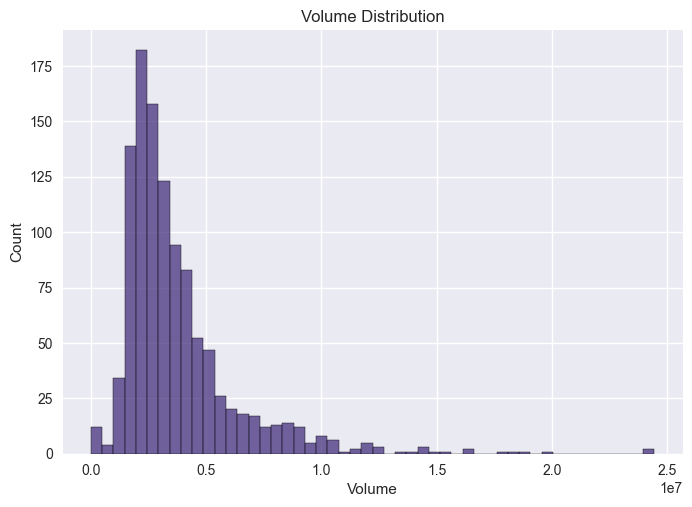

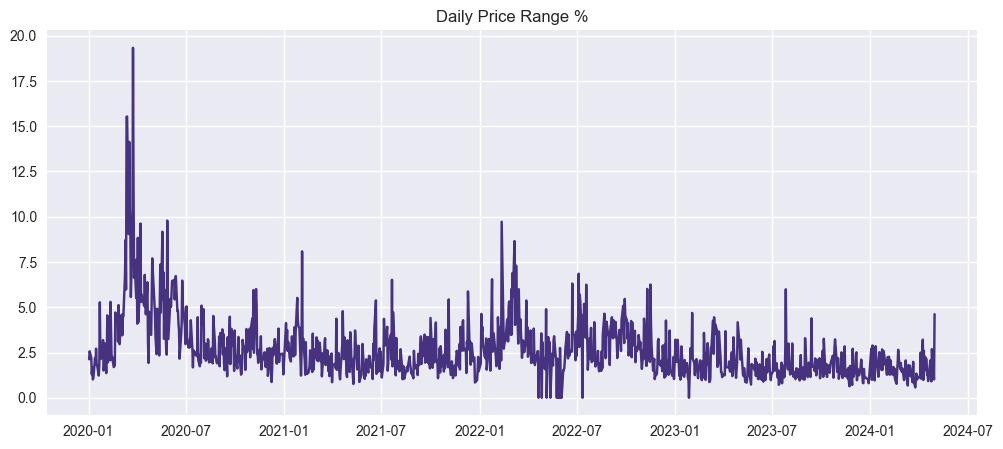

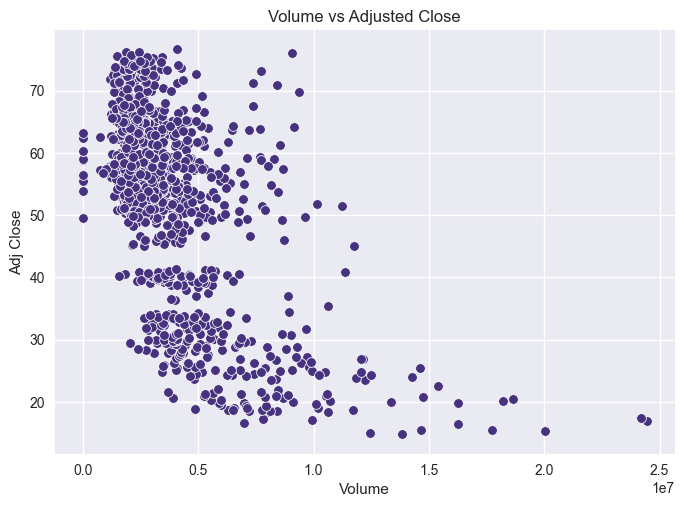

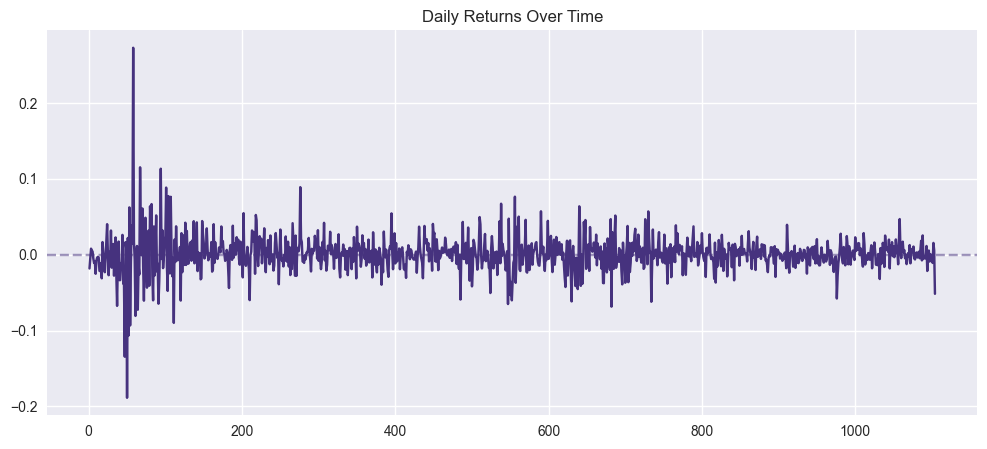

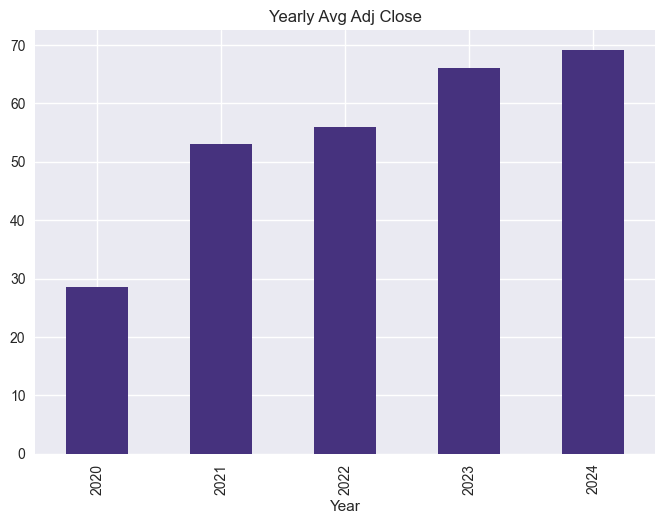

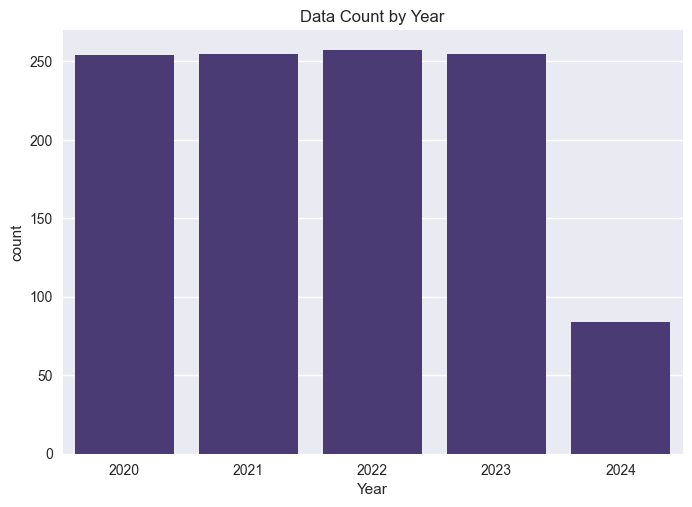

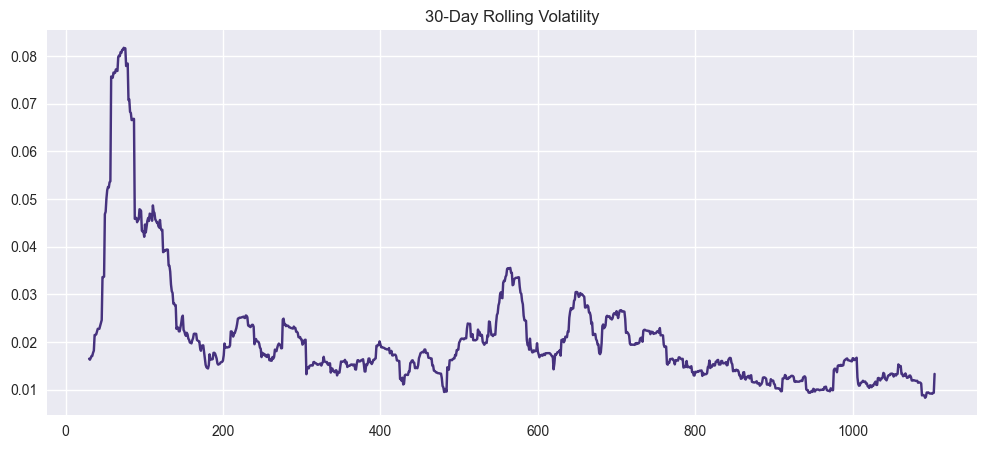

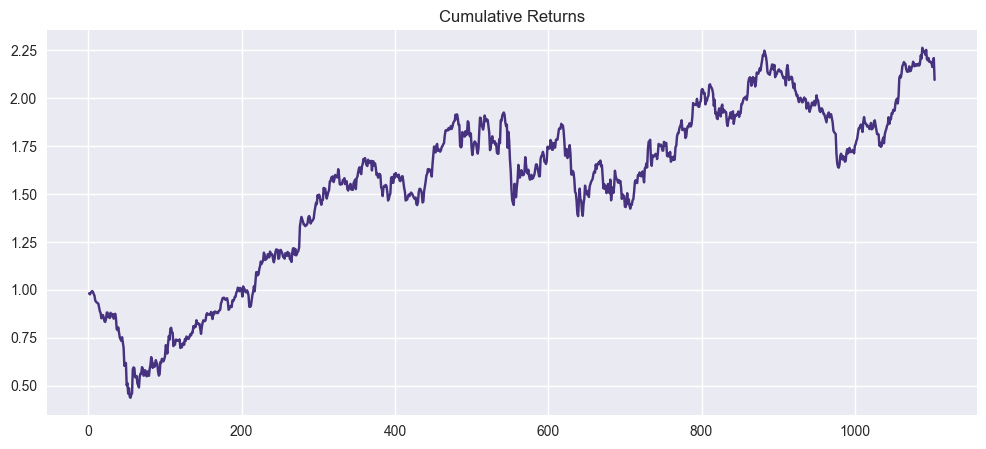

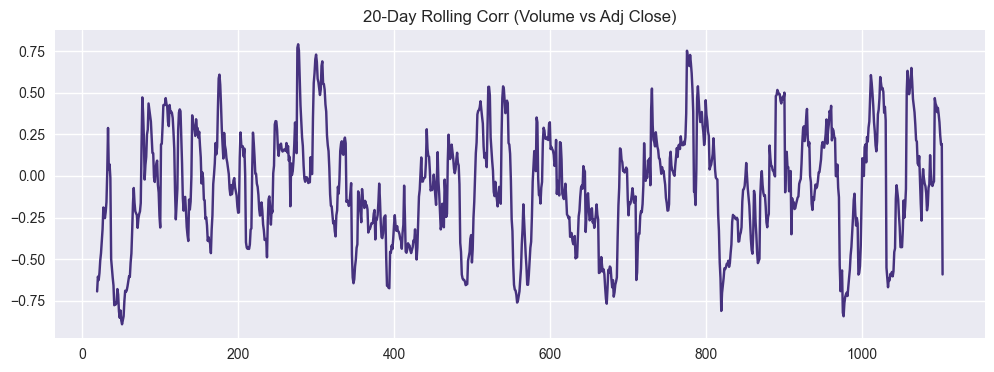

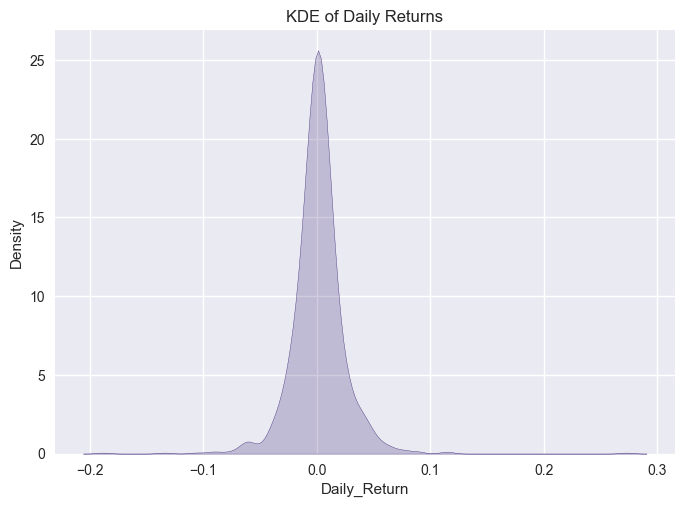

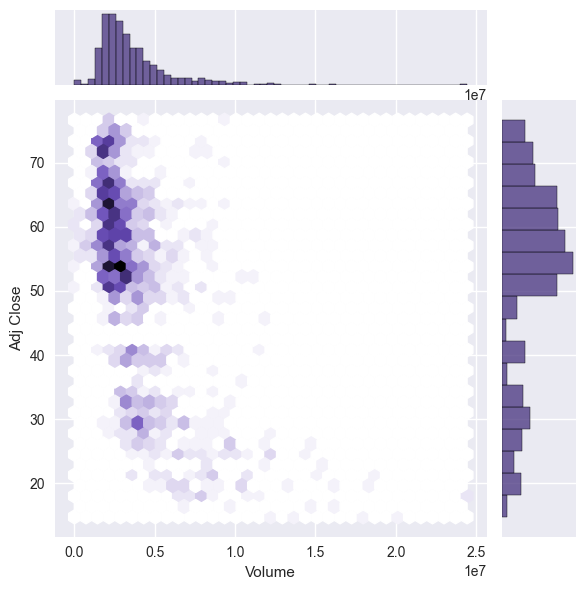

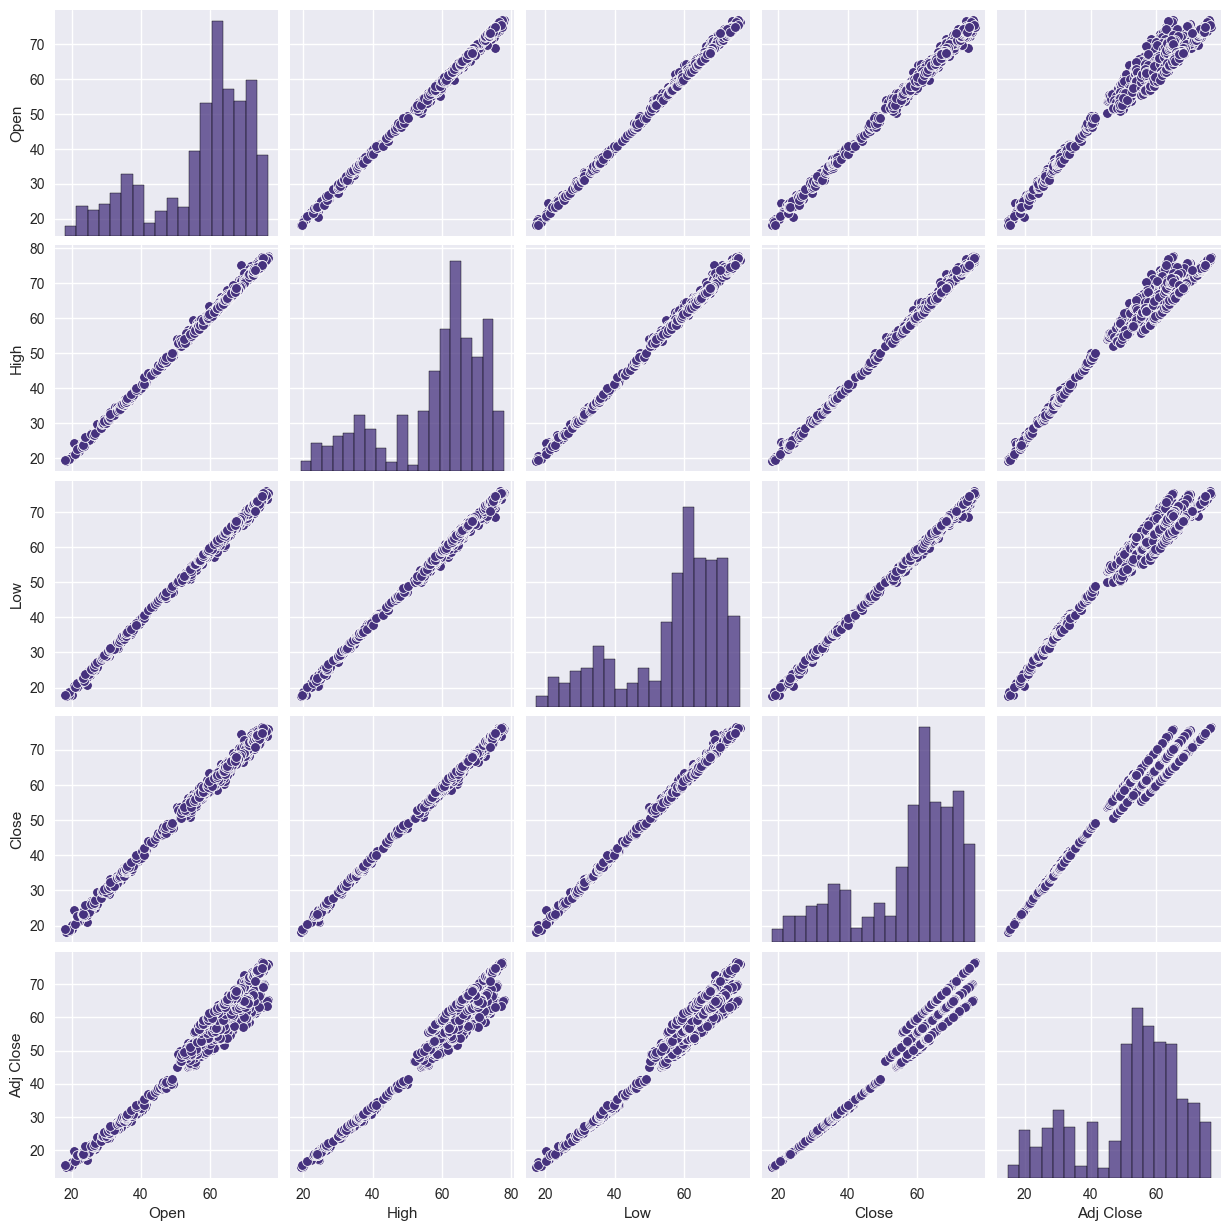

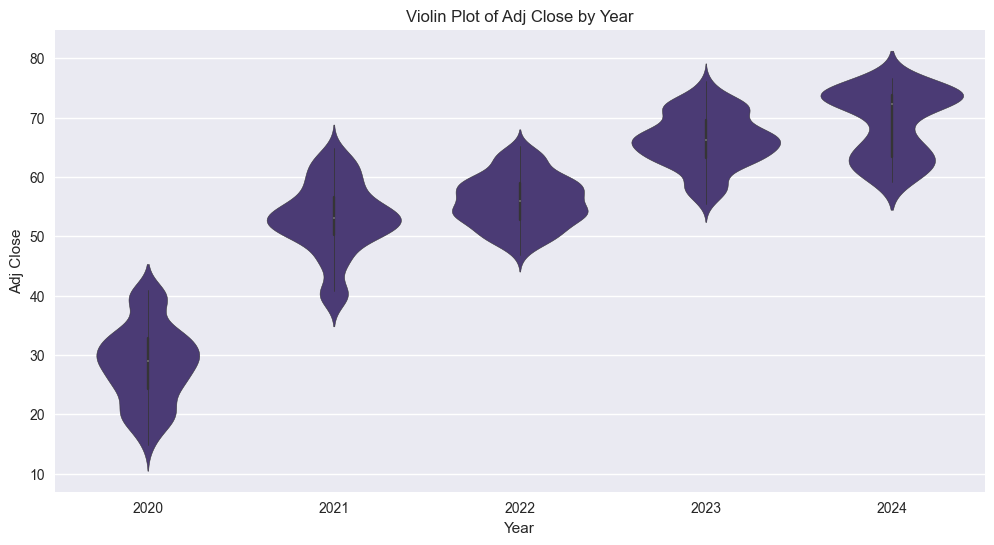

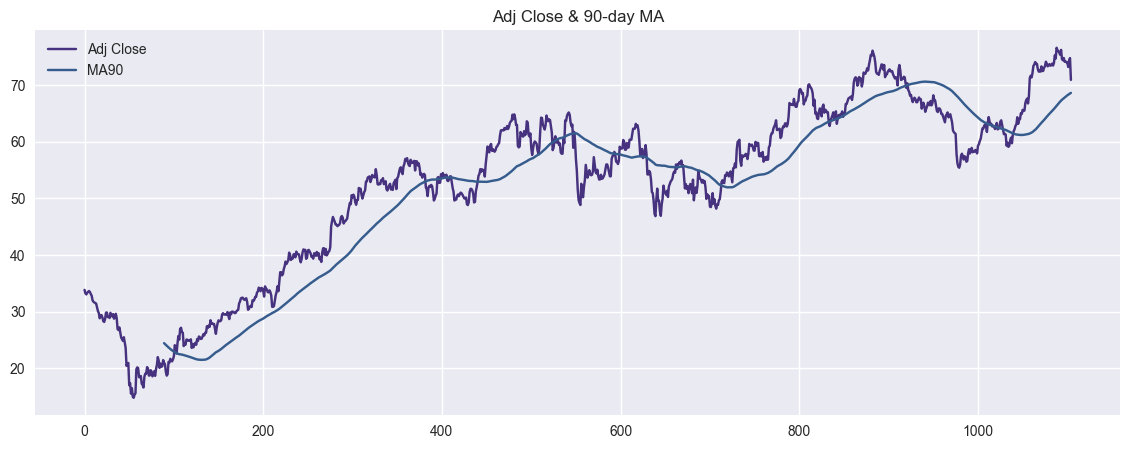

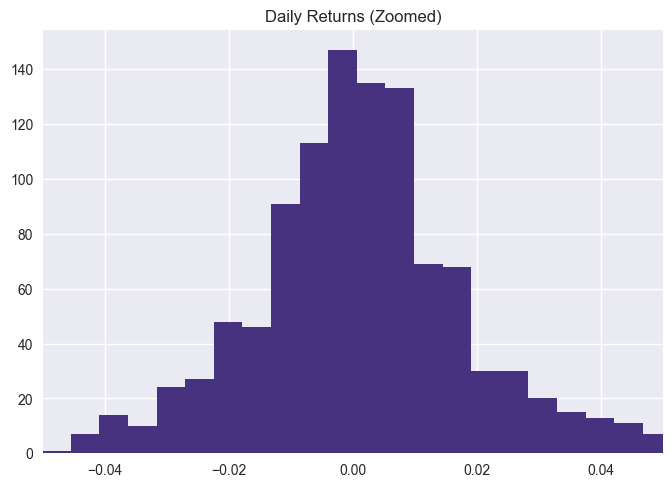

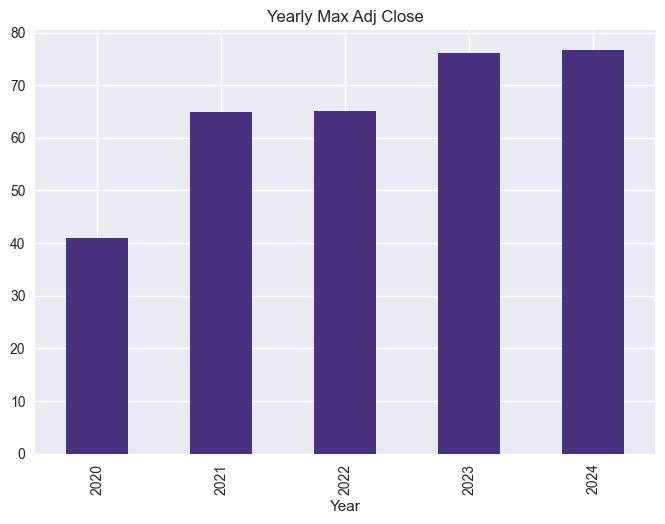

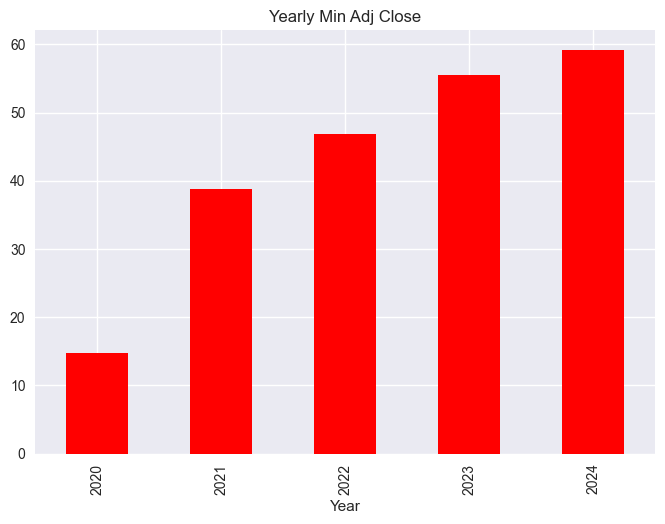

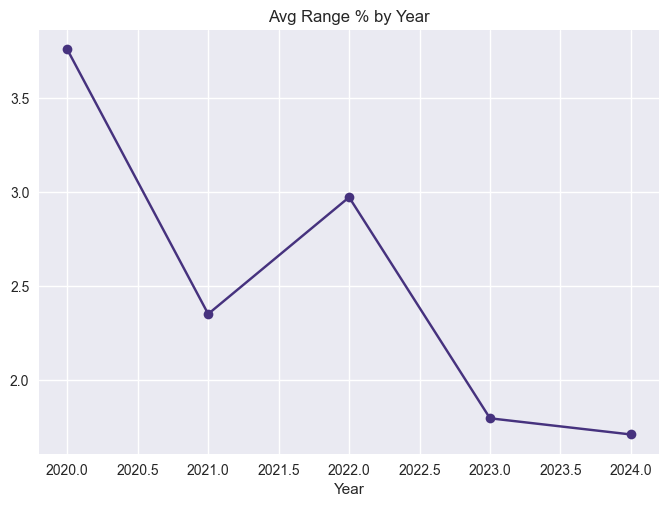

In [8]:
# 1. Line plot of adjusted close
df.plot(x='Date', y='Adj Close', title="Stock Price Over Time", figsize=(14,6))
plt.show()

# 2. Volume over time
px.area(df, x='Date', y='Volume', title='Volume Over Time').show()

# 3. Daily returns distribution
sns.histplot(df['Daily_Return'].dropna(), bins=100, kde=True)
plt.title("Distribution of Daily Returns")
plt.show()

# 4. Volatility over time
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Volatility'])
plt.title('Volatility Over Time')
plt.show()

# 5. Boxplot of Adjusted Close by Year
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Year', y='Adj Close')
plt.title("Boxplot of Adjusted Close by Year")
plt.show()

# 6. Correlation heatmap (FIXED)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 7. Moving Averages
df['MA20'] = df['Adj Close'].rolling(20).mean()
df['MA50'] = df['Adj Close'].rolling(50).mean()

# 8. Price vs MA20 & MA50
plt.figure(figsize=(15,6))
plt.plot(df['Date'], df['Adj Close'], label='Adj Close')
plt.plot(df['Date'], df['MA20'], label='MA20')
plt.plot(df['Date'], df['MA50'], label='MA50')
plt.title("Moving Averages")
plt.legend()
plt.show()

# 9. Candlestick Chart
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'], high=df['High'],
                low=df['Low'], close=df['Close'])])
fig.update_layout(title='Candlestick Chart', xaxis_rangeslider_visible=False)
fig.show()

# 10. Monthly average heatmap
monthly_avg = df.groupby(['Year','Month'])['Adj Close'].mean().unstack()
plt.figure(figsize=(12,6))
sns.heatmap(monthly_avg, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title("Monthly Avg Adj Close Heatmap")
plt.show()

# 11. Average close by weekday
weekday_avg = df.groupby('Weekday')['Adj Close'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
weekday_avg.plot(kind='bar', title='Average Close by Weekday')
plt.show()

# 12. Daily returns boxplot by weekday
sns.boxplot(x='Weekday', y='Daily_Return', data=df)
plt.title("Daily Return by Weekday")
plt.show()

# 13. Volume distribution
sns.histplot(df['Volume'], bins=50)
plt.title("Volume Distribution")
plt.show()

# 14. Range % over time
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Range_%'])
plt.title("Daily Price Range %")
plt.show()

# 15. Scatter: Volume vs Adj Close
sns.scatterplot(data=df, x='Volume', y='Adj Close')
plt.title("Volume vs Adjusted Close")
plt.show()

# 16. Daily return time series
df['Daily_Return'].plot(figsize=(12,5), title="Daily Returns Over Time")
plt.axhline(0, linestyle='--', alpha=0.5)
plt.show()

# 17. Yearly average closing price
df.groupby("Year")['Adj Close'].mean().plot(kind='bar', title='Yearly Avg Adj Close')
plt.show()

# 18. Count of data points by Year
sns.countplot(x='Year', data=df)
plt.title("Data Count by Year")
plt.show()

# 19. 1-month rolling volatility
df['Volatility_30'] = df['Daily_Return'].rolling(30).std()
df['Volatility_30'].plot(figsize=(12,5), title="30-Day Rolling Volatility")
plt.show()

# 20. Cumulative returns
cumulative = (1 + df['Daily_Return']).cumprod()
cumulative.plot(figsize=(12,5), title='Cumulative Returns')
plt.show()

# 21. Rolling correlation (20-day) between volume and adj close
df['Vol-Price Corr'] = df['Volume'].rolling(20).corr(df['Adj Close'])
df['Vol-Price Corr'].plot(title="20-Day Rolling Corr (Volume vs Adj Close)", figsize=(12,4))
plt.show()

# 22. KDE plot of Daily Returns
sns.kdeplot(df['Daily_Return'].dropna(), fill=True)
plt.title("KDE of Daily Returns")
plt.show()

# 23. Jointplot Volume vs Adj Close
sns.jointplot(data=df, x='Volume', y='Adj Close', kind='hex')
plt.show()

# 24. Pairplot
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Adj Close']])
plt.show()

# 25. Violin plot: Adjusted Close by Year
plt.figure(figsize=(12,6))
sns.violinplot(x='Year', y='Adj Close', data=df)
plt.title("Violin Plot of Adj Close by Year")
plt.show()

# 26. Rolling Mean of Adj Close (90 days)
df['MA90'] = df['Adj Close'].rolling(90).mean()
df[['Adj Close', 'MA90']].plot(figsize=(14,5), title='Adj Close & 90-day MA')
plt.show()

# 27. Histogram of Daily Returns (Zoomed: -0.05 to 0.05)
df['Daily_Return'].hist(bins=100)
plt.xlim(-0.05, 0.05)
plt.title("Daily Returns (Zoomed)")
plt.show()

# 28. Max Price Each Year
df.groupby('Year')['Adj Close'].max().plot(kind='bar', title='Yearly Max Adj Close')
plt.show()

# 29. Min Price Each Year
df.groupby('Year')['Adj Close'].min().plot(kind='bar', title='Yearly Min Adj Close', color='red')
plt.show()

# 30. Average Range % by Year
df.groupby('Year')['Range_%'].mean().plot(kind='line', marker='o', title='Avg Range % by Year')
plt.show()


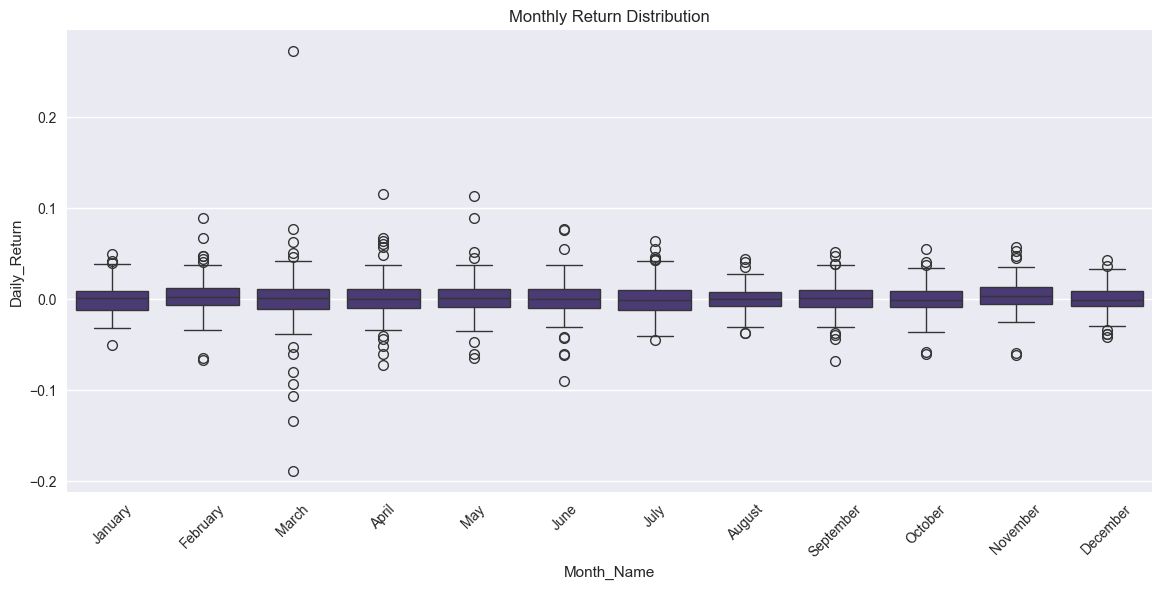

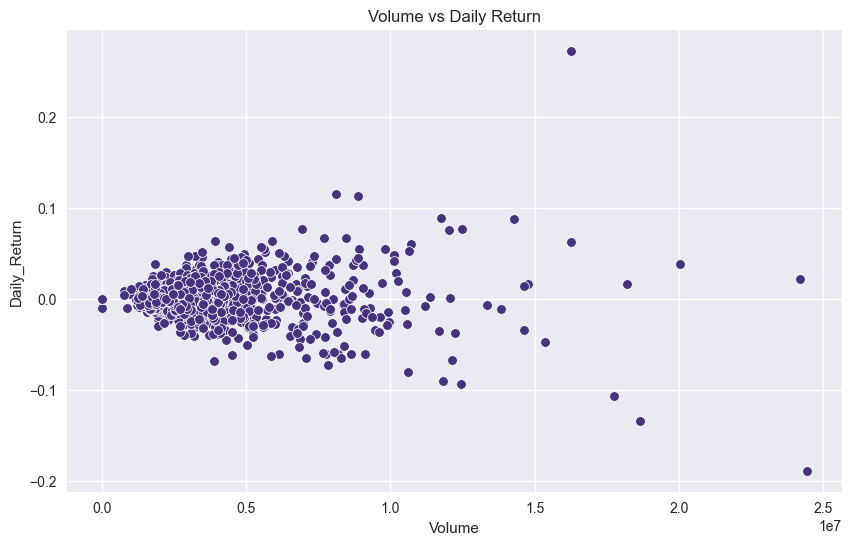

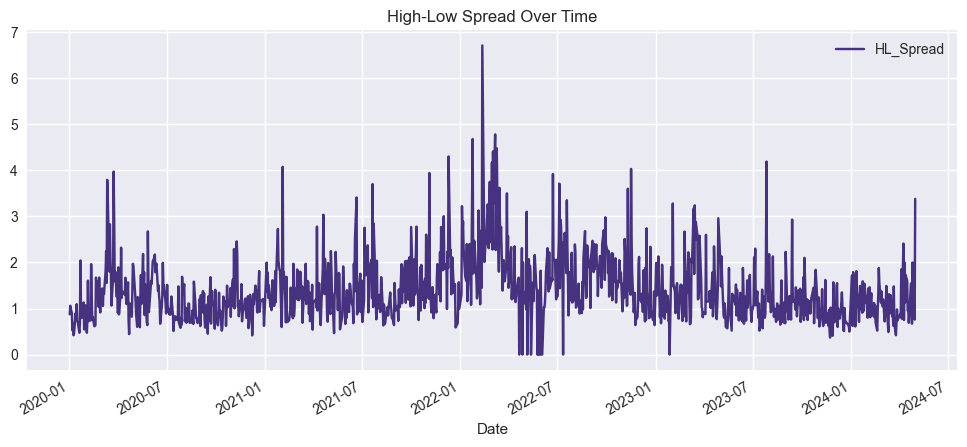

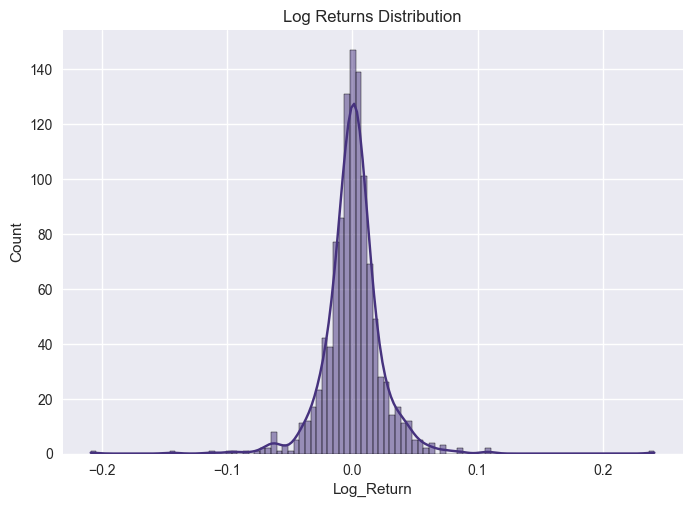

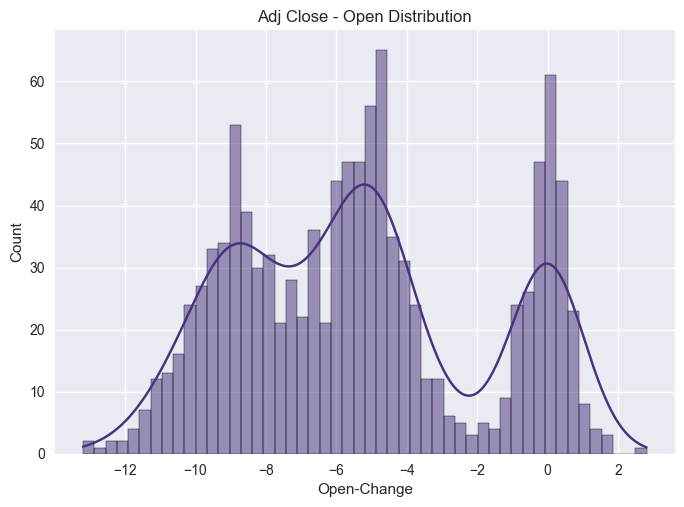

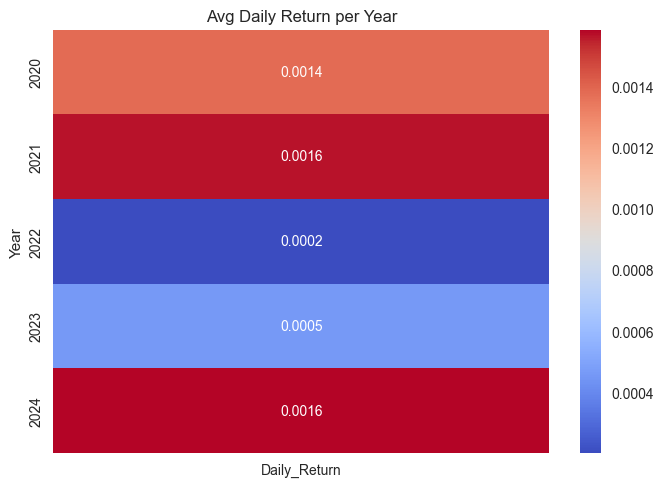

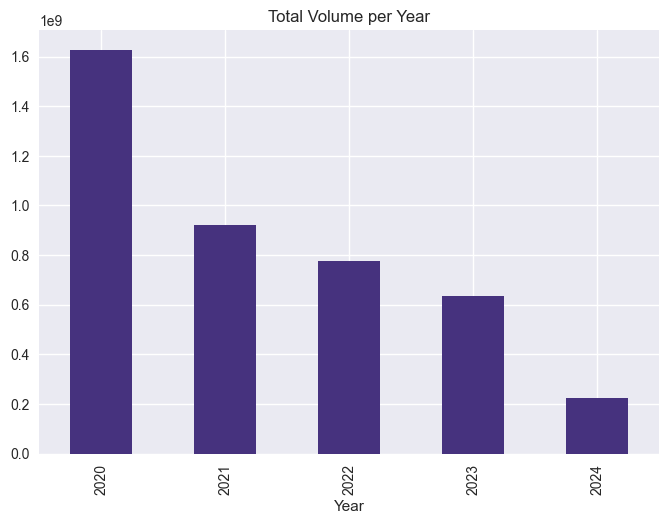

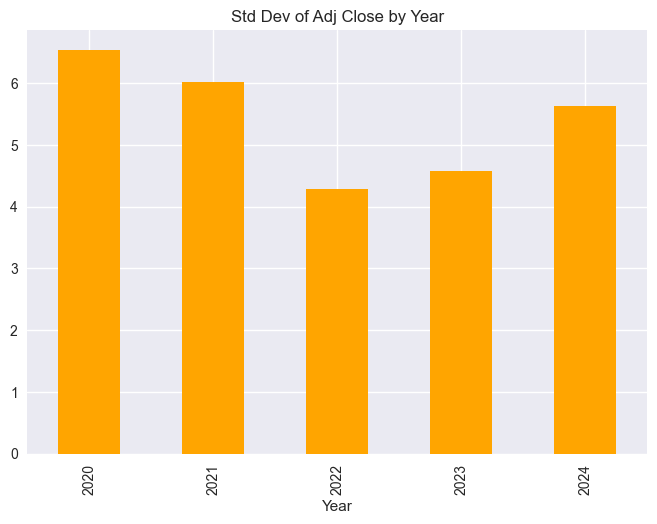

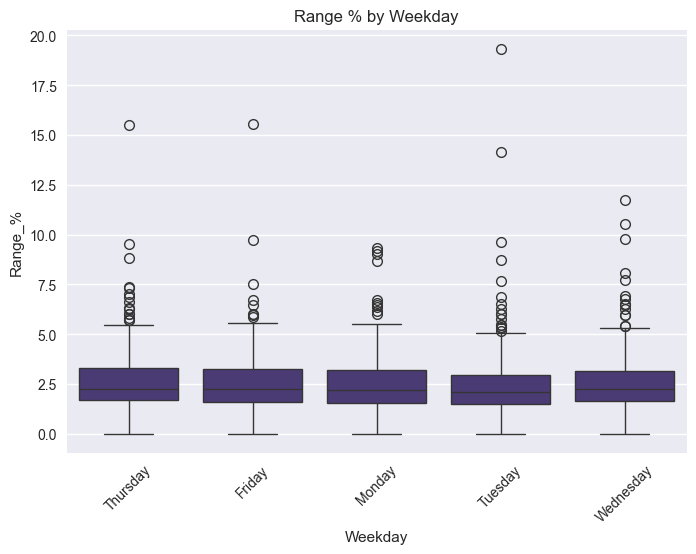

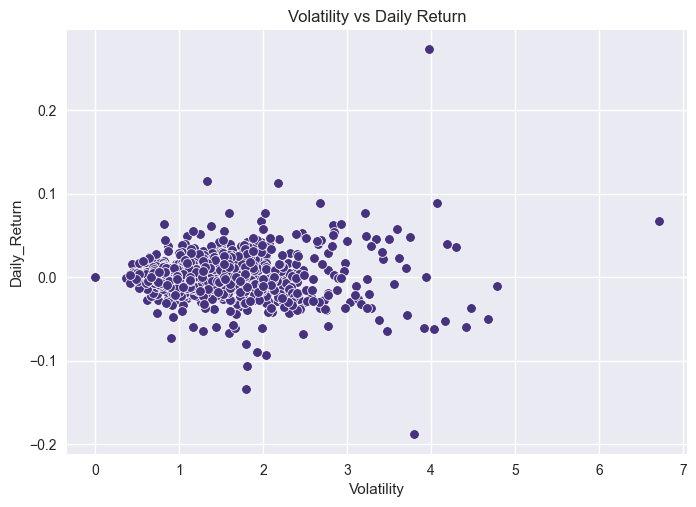

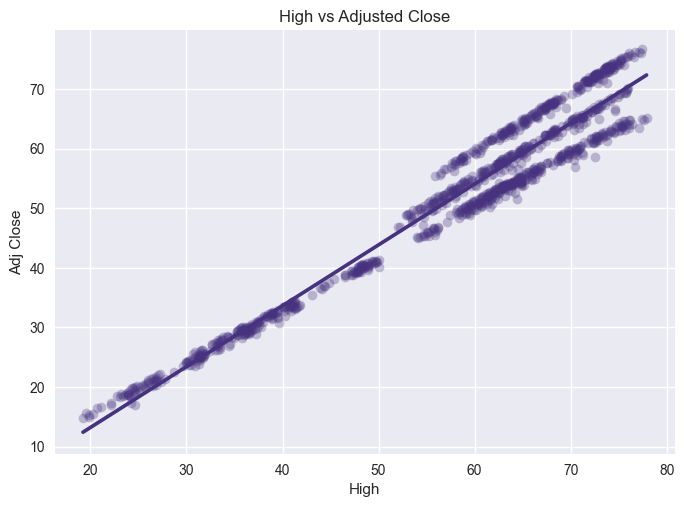

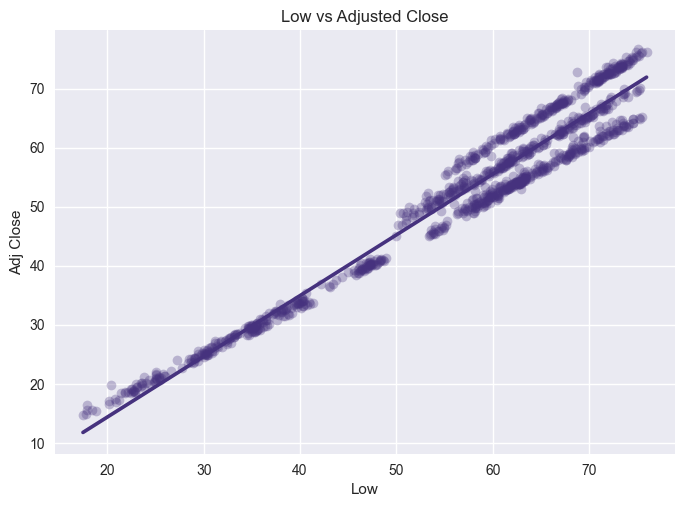

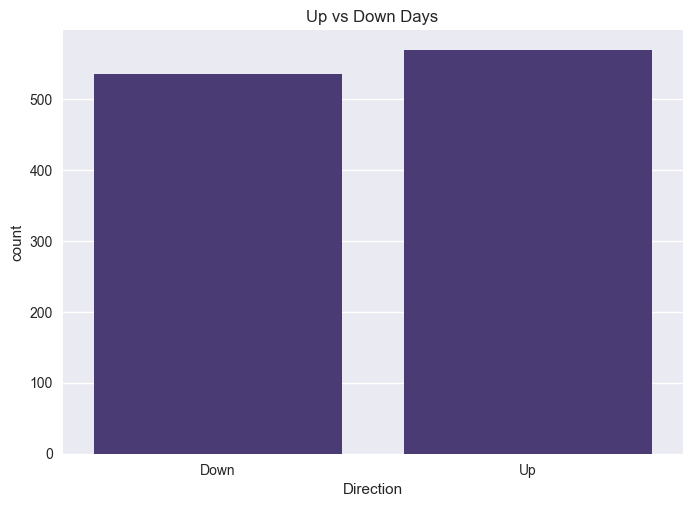

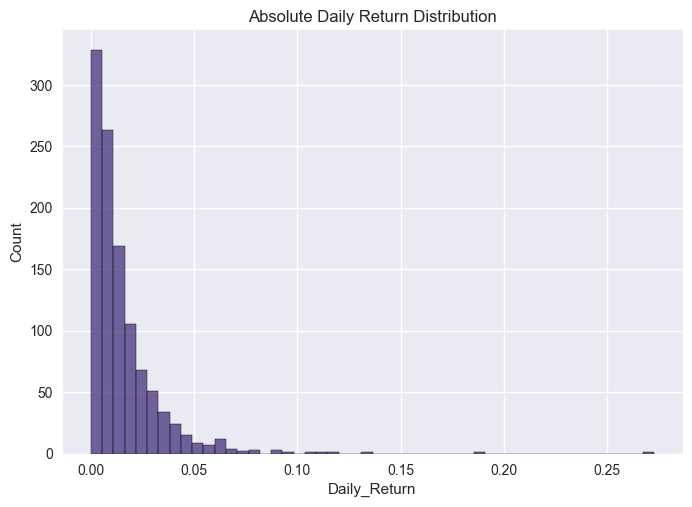

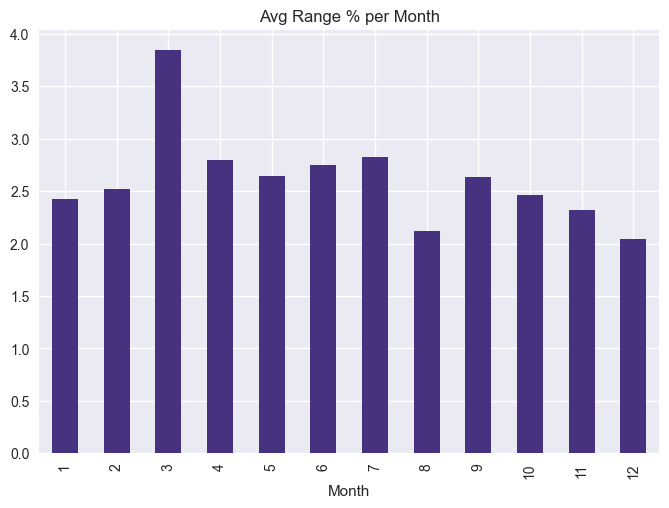

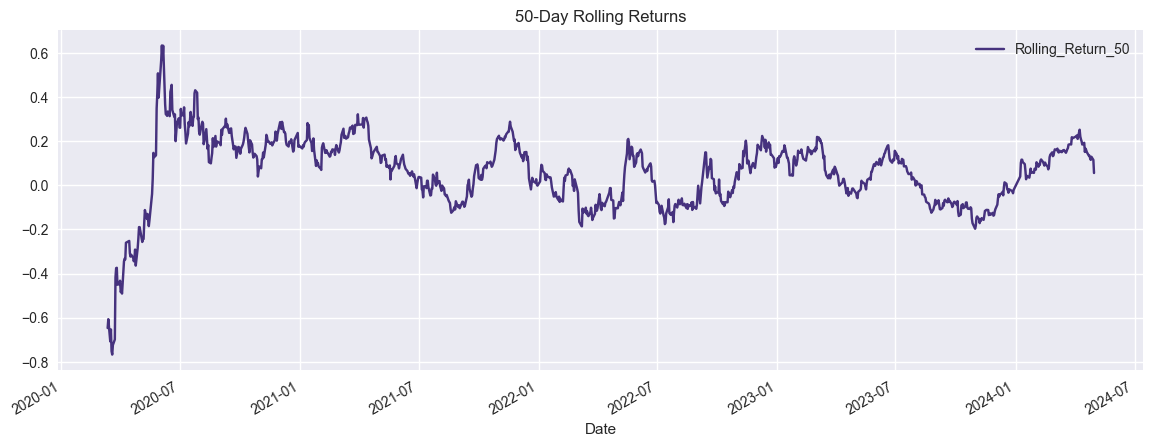

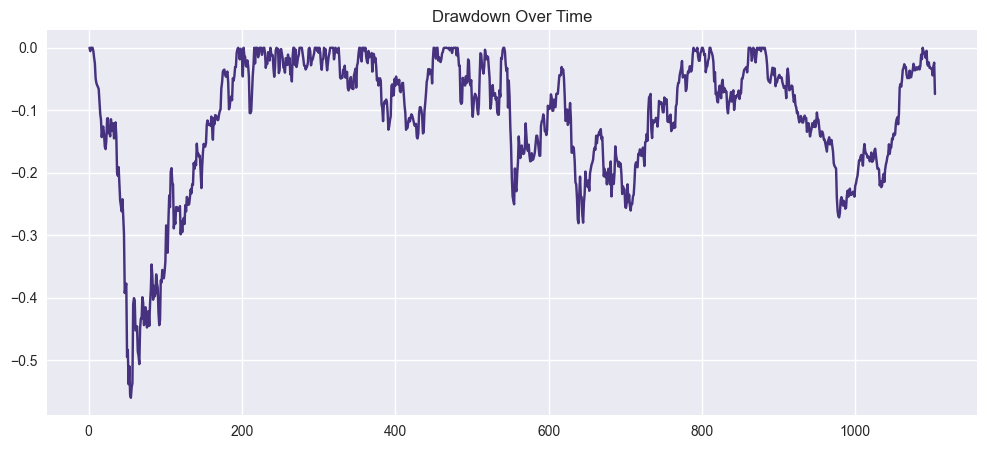

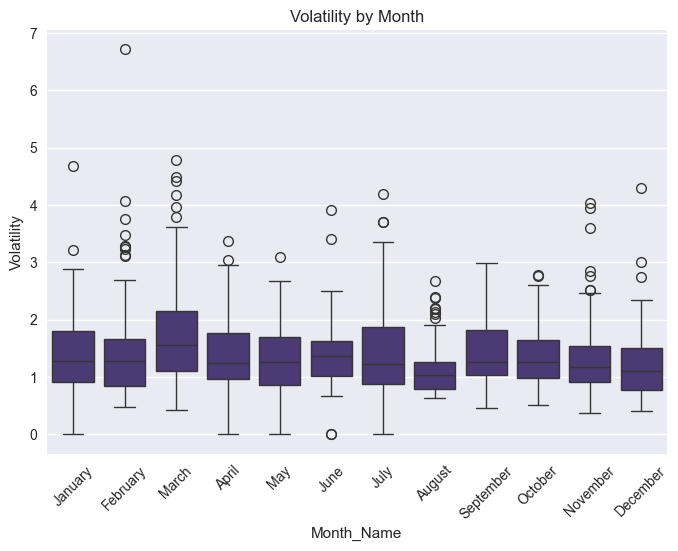

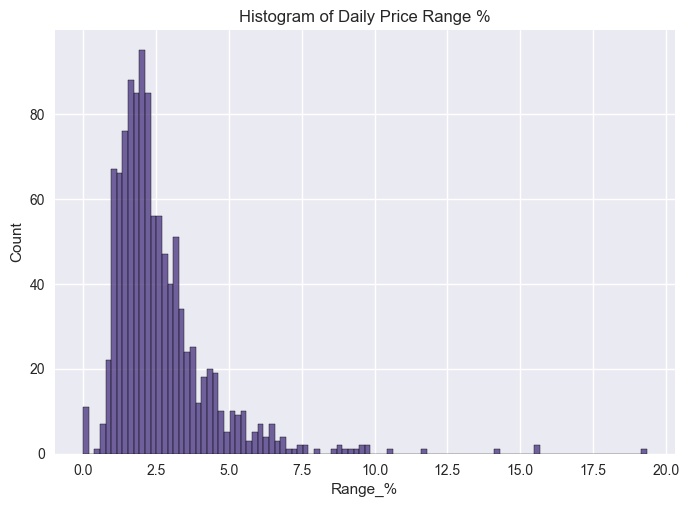

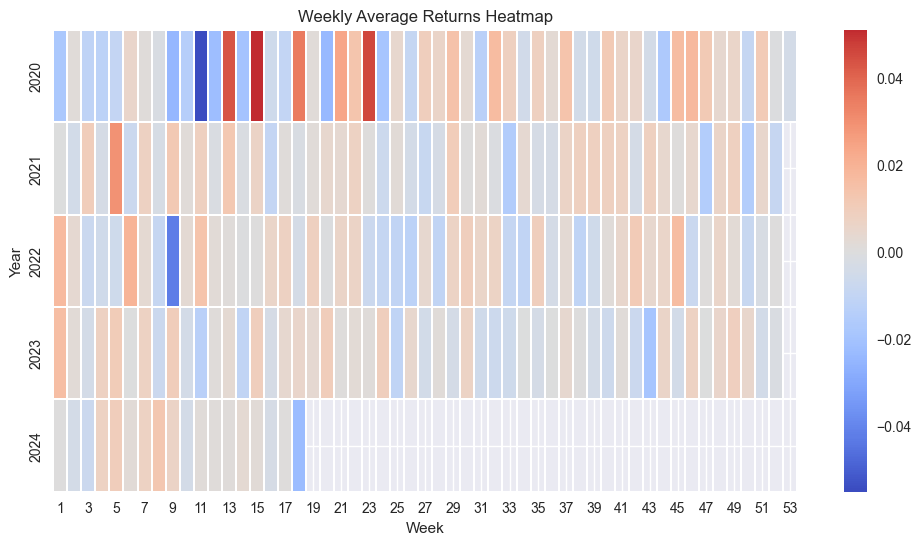

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 31. Monthly return boxplot
df['Month_Name'] = df['Date'].dt.strftime('%B')
plt.figure(figsize=(14,6))
sns.boxplot(x='Month_Name', y='Daily_Return', data=df, order=[
    'January','February','March','April','May','June','July',
    'August','September','October','November','December'])
plt.xticks(rotation=45)
plt.title('Monthly Return Distribution')
plt.show()

# 32. Daily return scatter vs volume
plt.figure(figsize=(10,6))
sns.scatterplot(x='Volume', y='Daily_Return', data=df)
plt.title('Volume vs Daily Return')
plt.show()

# 33. High-Low spread over time
df['HL_Spread'] = df['High'] - df['Low']
df[['Date', 'HL_Spread']].set_index('Date').plot(title='High-Low Spread Over Time', figsize=(12,5))
plt.show()

# 34. Log returns distribution
df['Log_Return'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
sns.histplot(df['Log_Return'].dropna(), bins=100, kde=True)
plt.title("Log Returns Distribution")
plt.show()

# 35. Adjusted Close change vs Open
df['Open-Change'] = df['Adj Close'] - df['Open']
sns.histplot(df['Open-Change'], bins=50, kde=True)
plt.title('Adj Close - Open Distribution')
plt.show()

# 36. Yearly return heatmap
yearly_return = df.groupby("Year")['Daily_Return'].mean().to_frame()
sns.heatmap(yearly_return, annot=True, cmap='coolwarm', fmt=".4f")
plt.title("Avg Daily Return per Year")
plt.show()

# 37. Volume by Year
df.groupby("Year")['Volume'].sum().plot(kind='bar', title='Total Volume per Year')
plt.show()

# 38. Standard Deviation by Year
df.groupby("Year")['Adj Close'].std().plot(kind='bar', title='Std Dev of Adj Close by Year', color='orange')
plt.show()

# 39. Range % distribution by weekday
sns.boxplot(x='Weekday', y='Range_%', data=df)
plt.title("Range % by Weekday")
plt.xticks(rotation=45)
plt.show()

# 40. Volatility vs Daily Return scatter
sns.scatterplot(x='Volatility', y='Daily_Return', data=df)
plt.title('Volatility vs Daily Return')
plt.show()

# 41. Adj Close vs High correlation
sns.regplot(x='High', y='Adj Close', data=df, scatter_kws={'alpha':0.3})
plt.title("High vs Adjusted Close")
plt.show()

# 42. Adj Close vs Low correlation
sns.regplot(x='Low', y='Adj Close', data=df, scatter_kws={'alpha':0.3})
plt.title("Low vs Adjusted Close")
plt.show()

# 43. Count of Up vs Down Days
df['Direction'] = np.where(df['Daily_Return'] > 0, 'Up', 'Down')
sns.countplot(x='Direction', data=df)
plt.title("Up vs Down Days")
plt.show()

# 44. Histogram of absolute daily return
sns.histplot(df['Daily_Return'].abs(), bins=50)
plt.title("Absolute Daily Return Distribution")
plt.show()

# 45. Average Range % per Month
df.groupby('Month')['Range_%'].mean().plot(kind='bar', title='Avg Range % per Month')
plt.show()

# 46. 50-day rolling returns
df['Rolling_Return_50'] = df['Daily_Return'].rolling(50).sum()
df[['Date', 'Rolling_Return_50']].set_index('Date').plot(title='50-Day Rolling Returns', figsize=(14,5))
plt.show()

# 47. Max Drawdown plot
df['Cumulative'] = (1 + df['Daily_Return']).cumprod()
df['Peak'] = df['Cumulative'].cummax()
df['Drawdown'] = df['Cumulative'] / df['Peak'] - 1
df['Drawdown'].plot(title="Drawdown Over Time", figsize=(12,5))
plt.show()

# 48. Monthly volatility boxplot
sns.boxplot(x='Month_Name', y='Volatility', data=df, order=[
    'January','February','March','April','May','June','July',
    'August','September','October','November','December'])
plt.xticks(rotation=45)
plt.title("Volatility by Month")
plt.show()

# 49. Histogram of Range %
sns.histplot(df['Range_%'], bins=100)
plt.title("Histogram of Daily Price Range %")
plt.show()

# 50. Heatmap of Weekly Avg Returns
df['Week'] = df['Date'].dt.isocalendar().week
weekly = df.groupby(['Year','Week'])['Daily_Return'].mean().unstack()
plt.figure(figsize=(12,6))
sns.heatmap(weekly, cmap="coolwarm", center=0, annot=False, linewidths=0.1)
plt.title("Weekly Average Returns Heatmap")
plt.show()


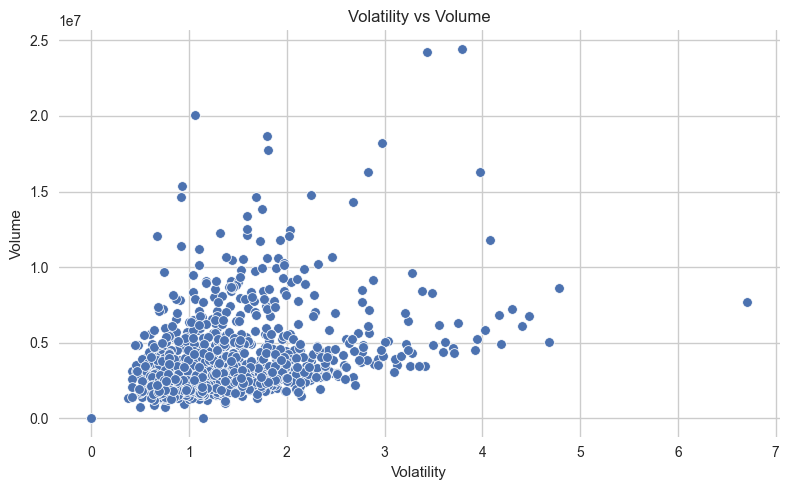

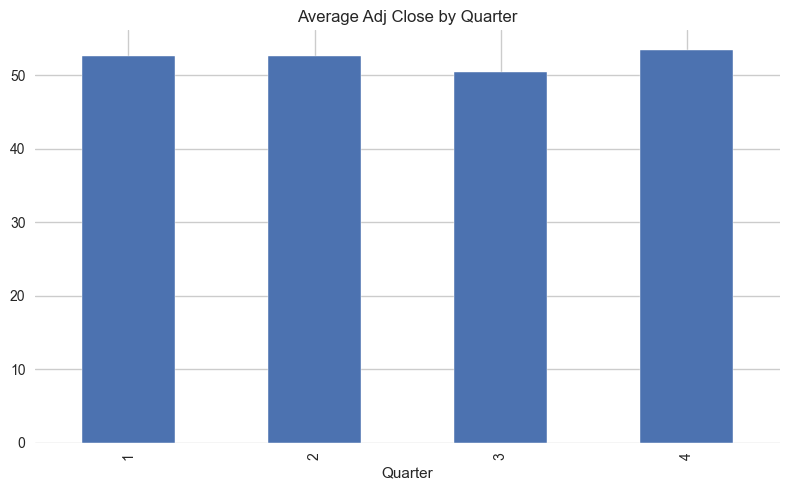

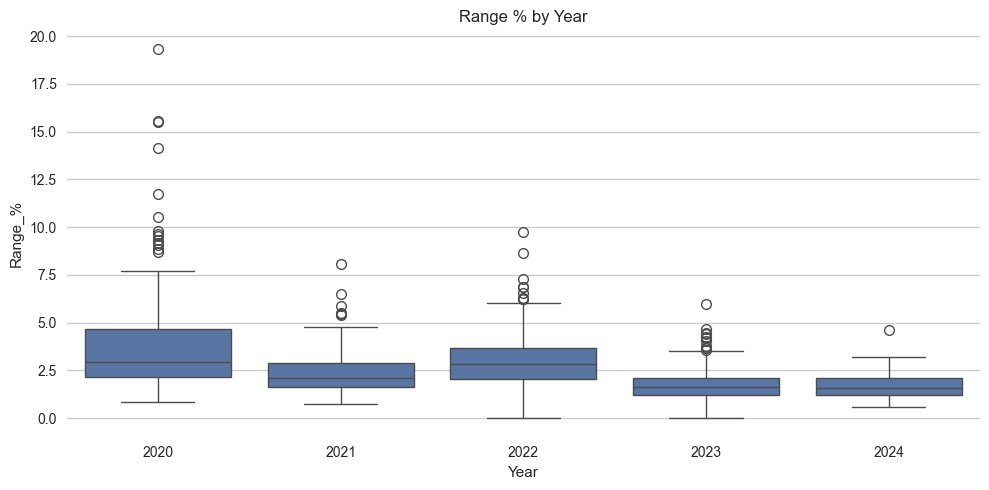

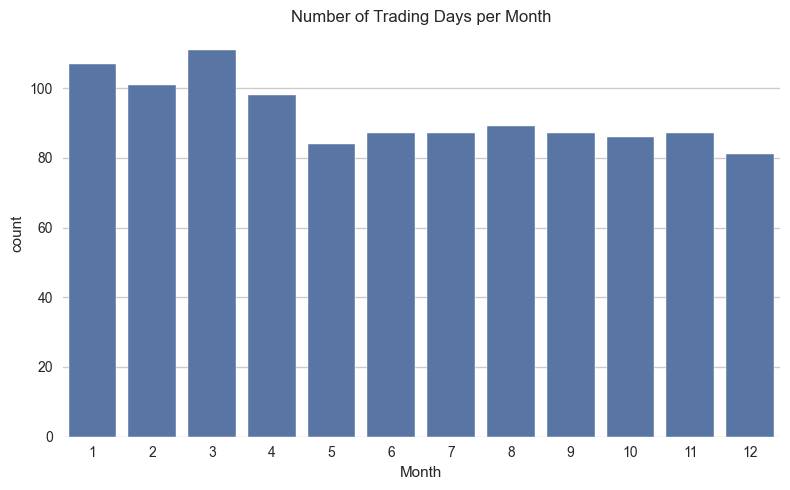

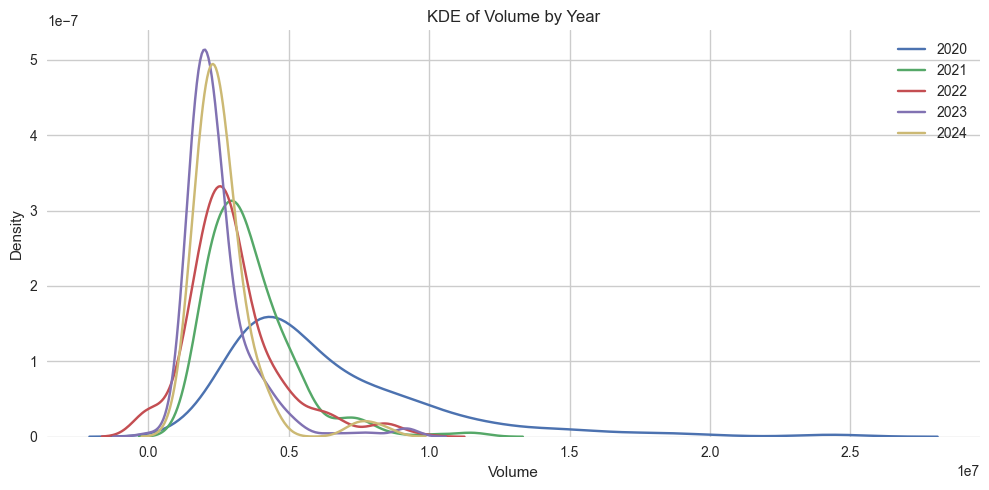

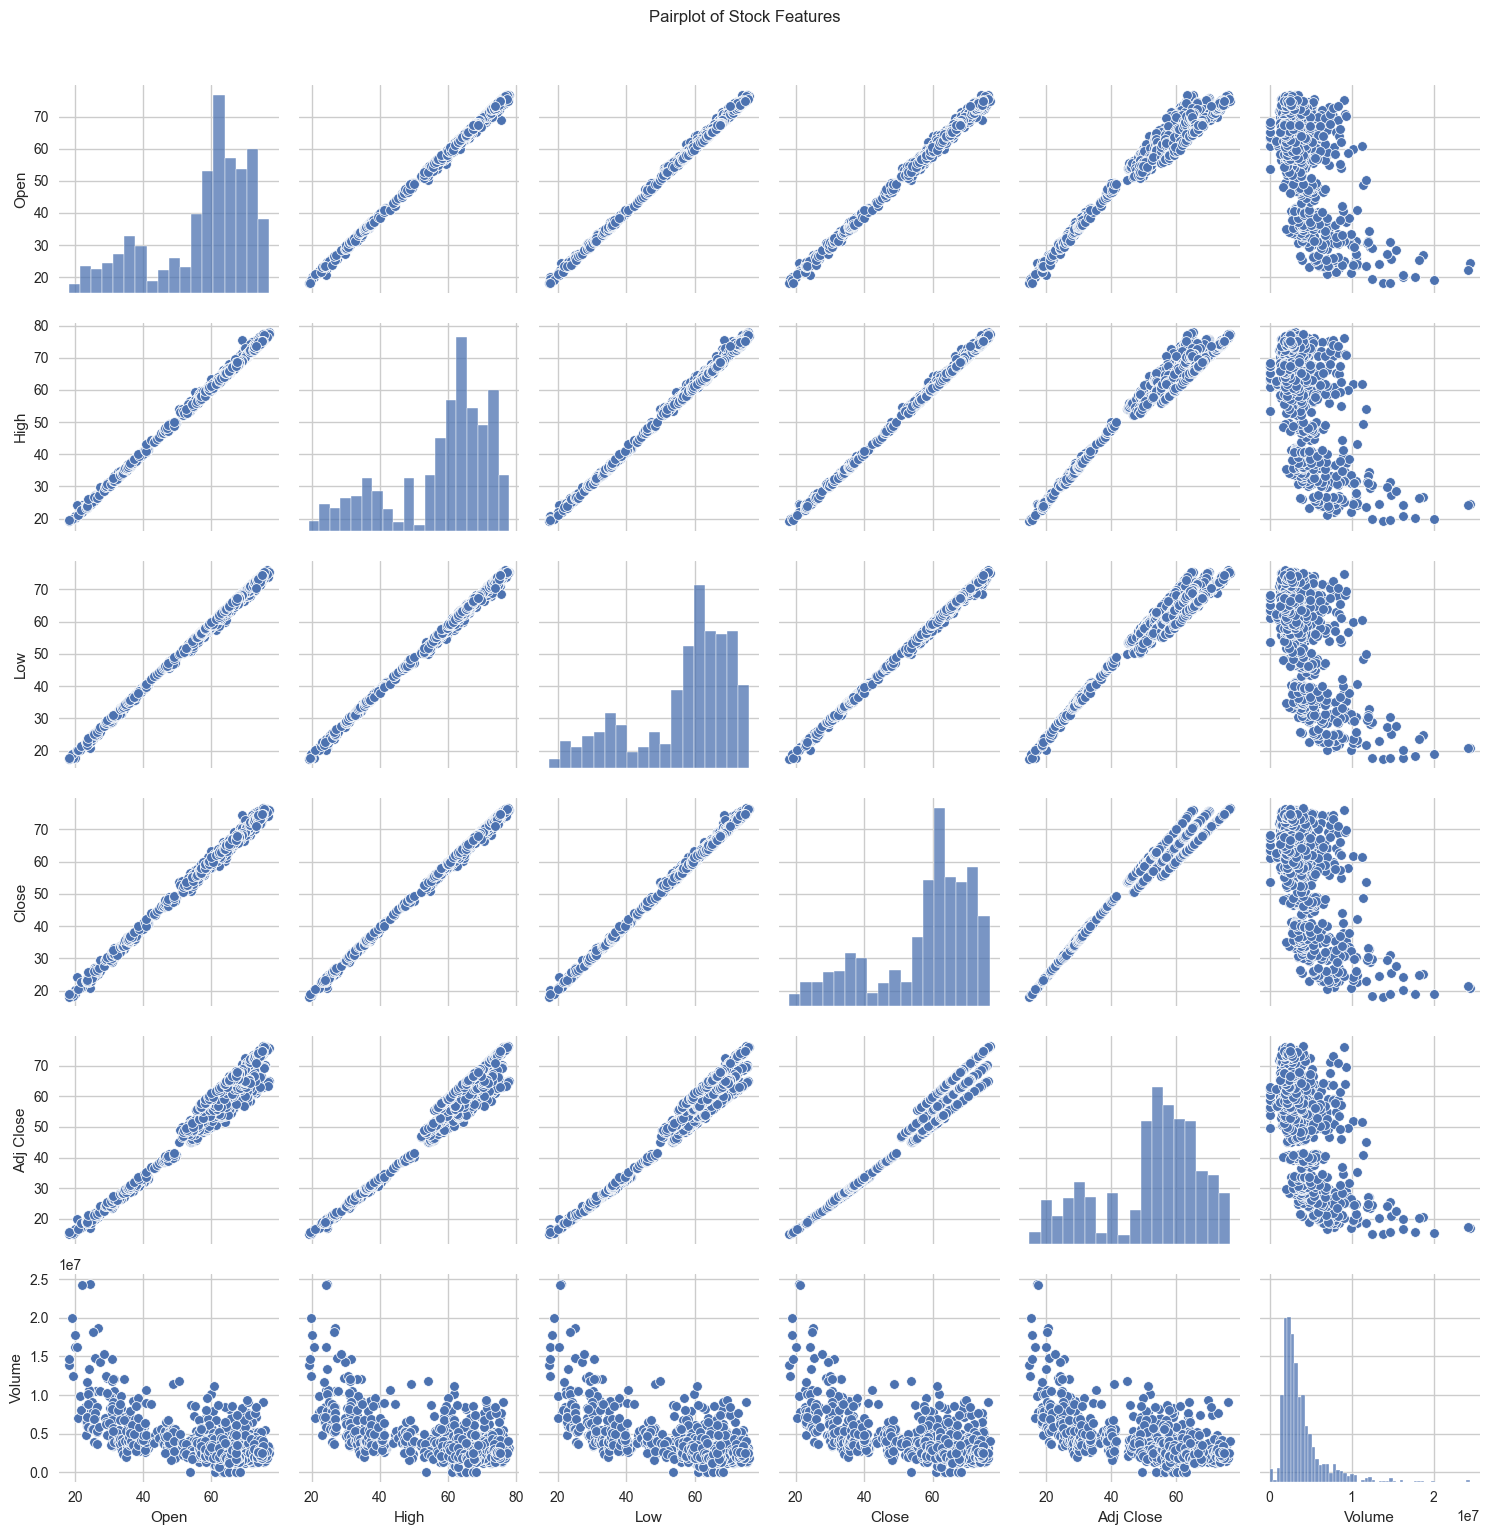

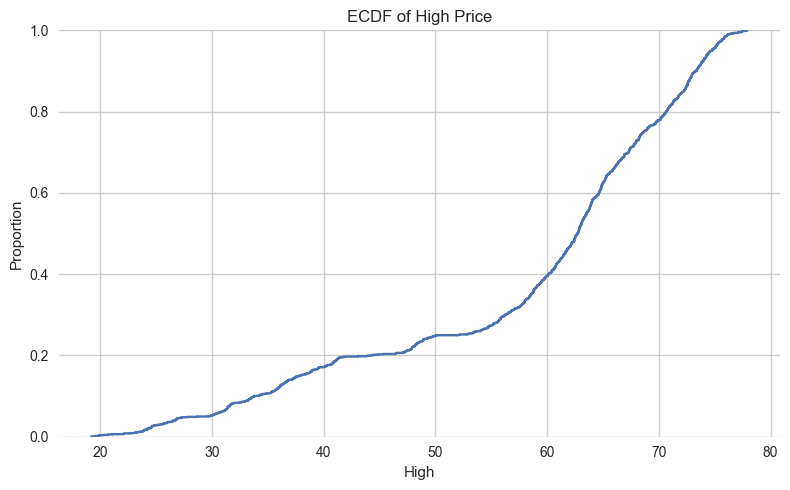

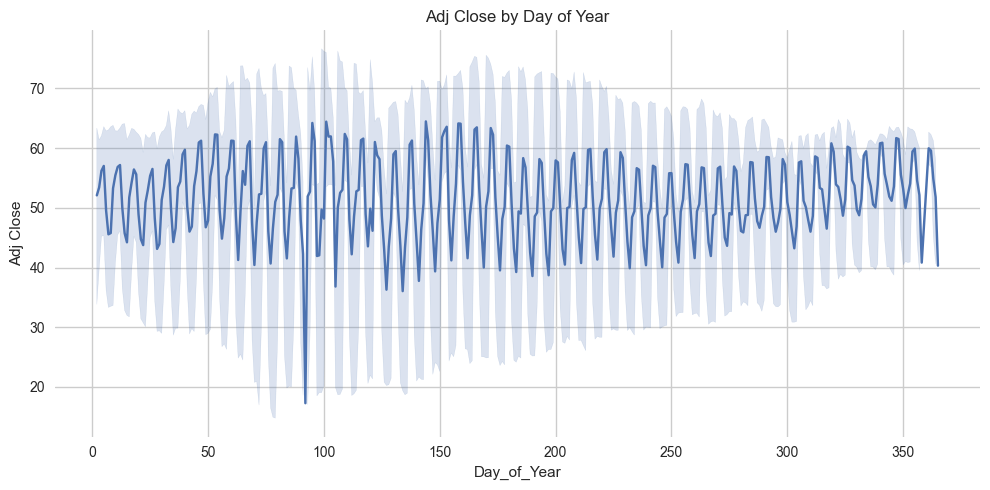

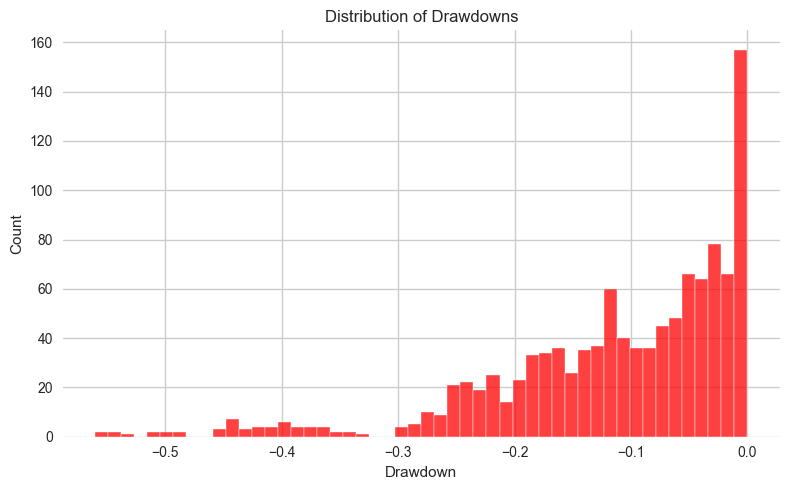

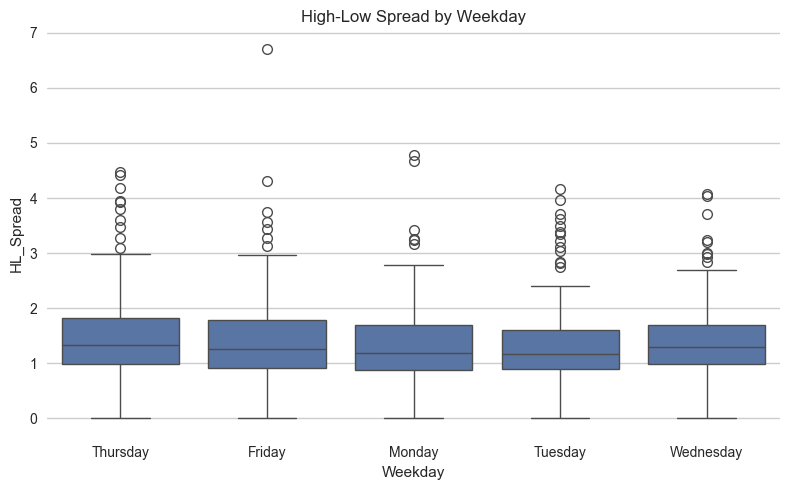

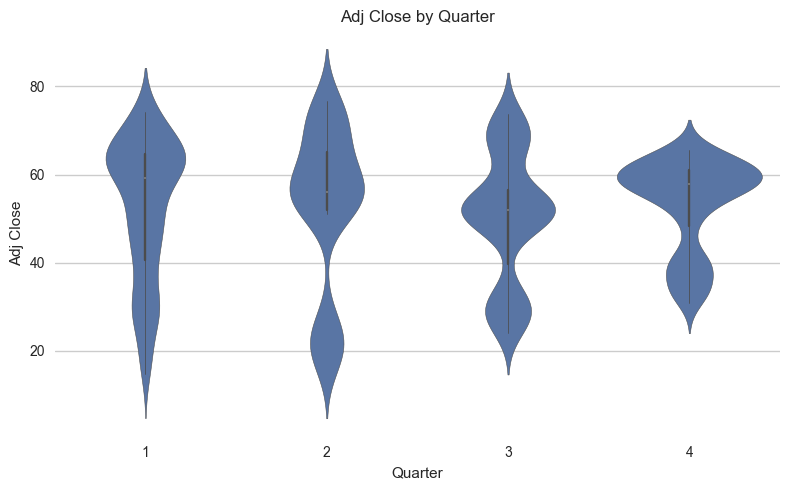

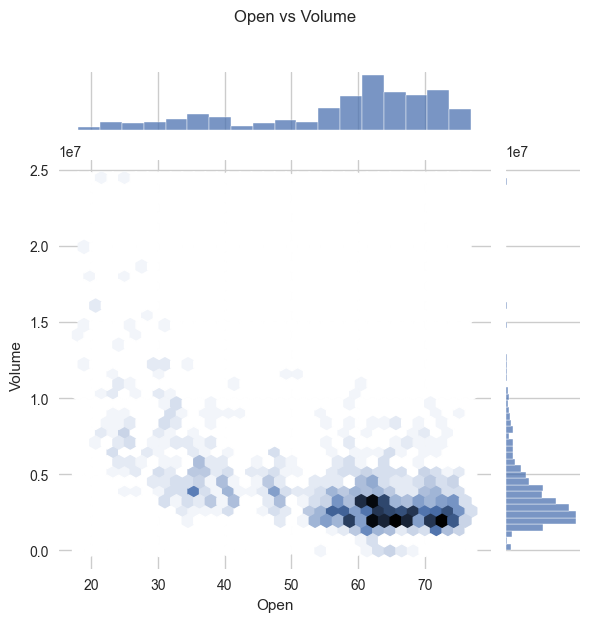

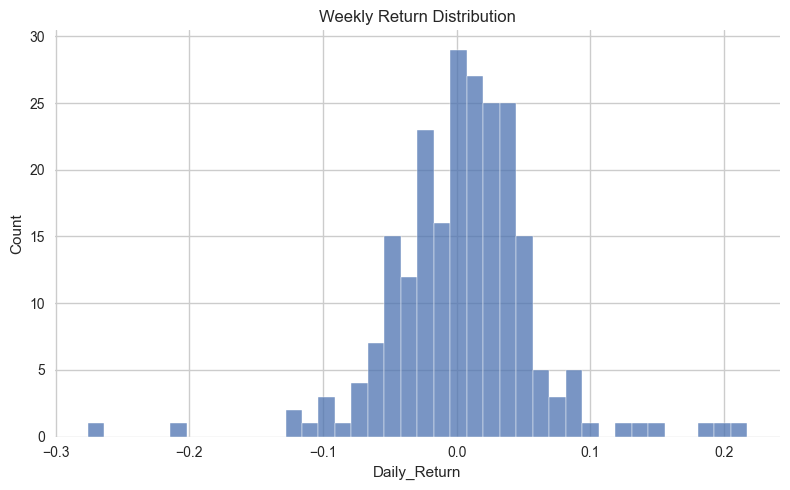

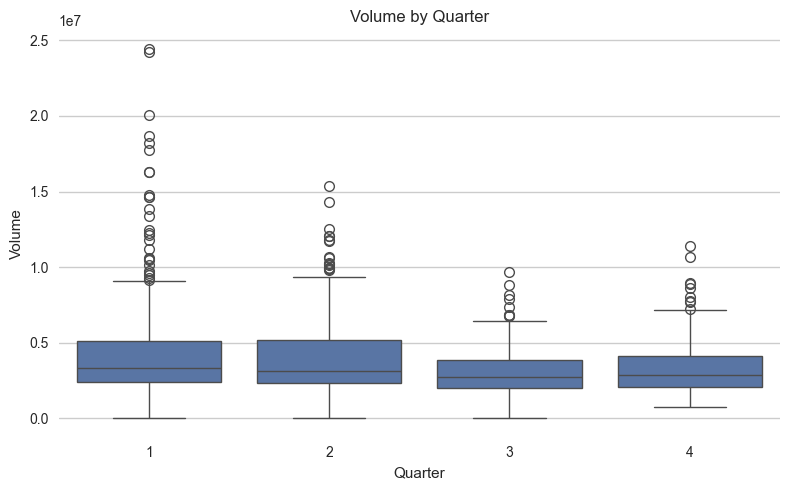

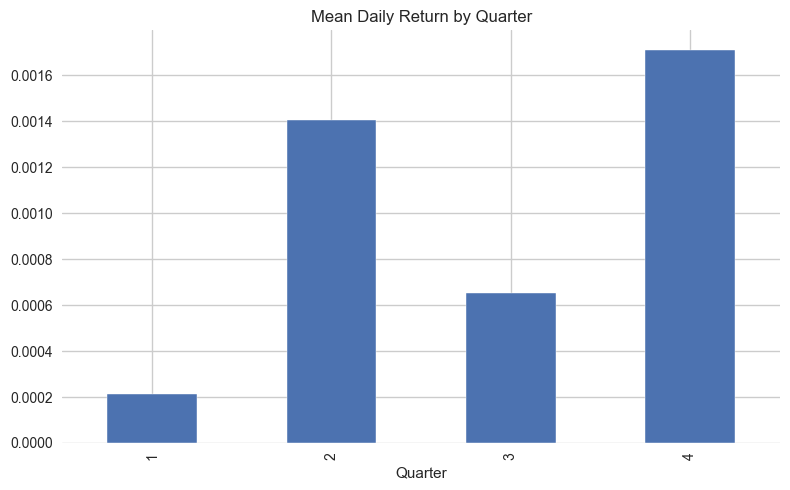

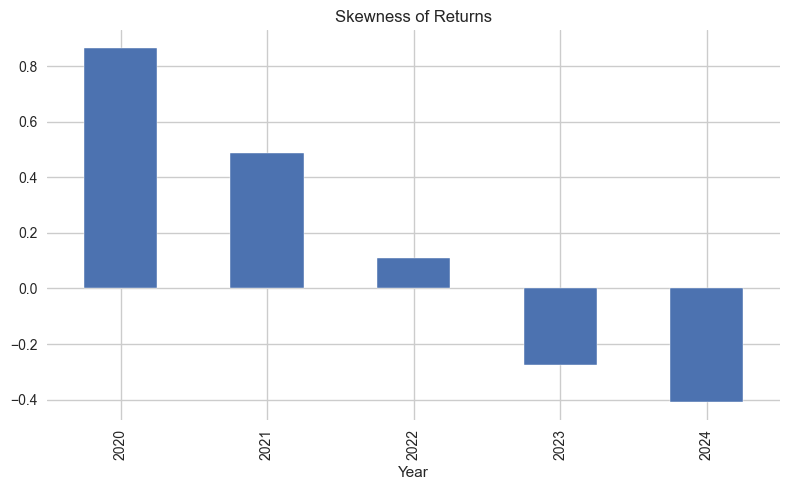

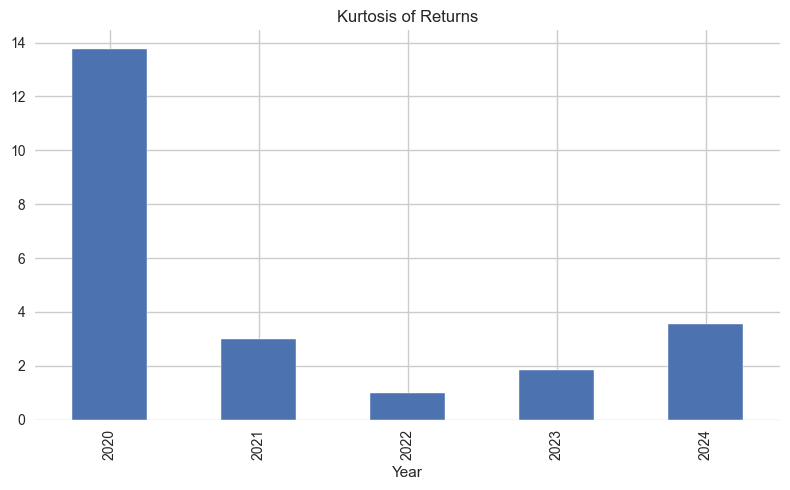

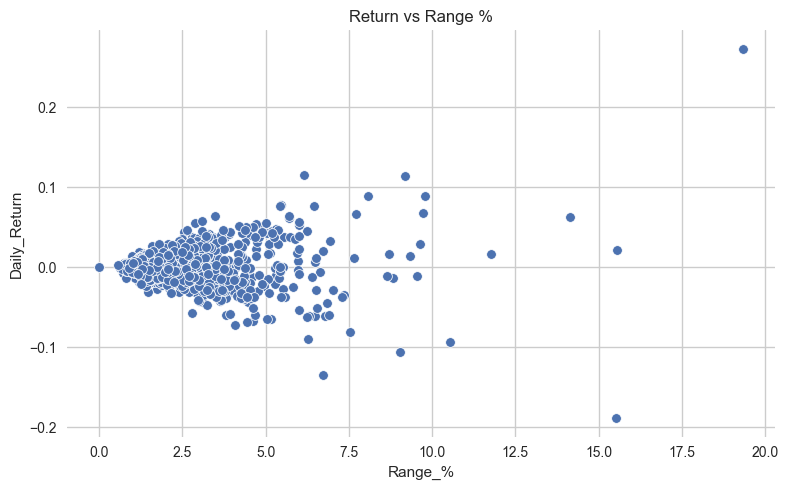

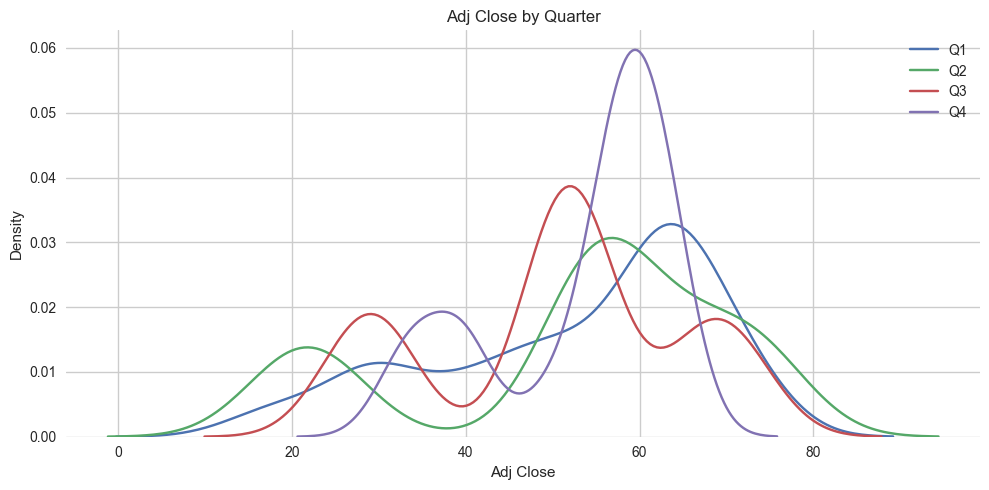

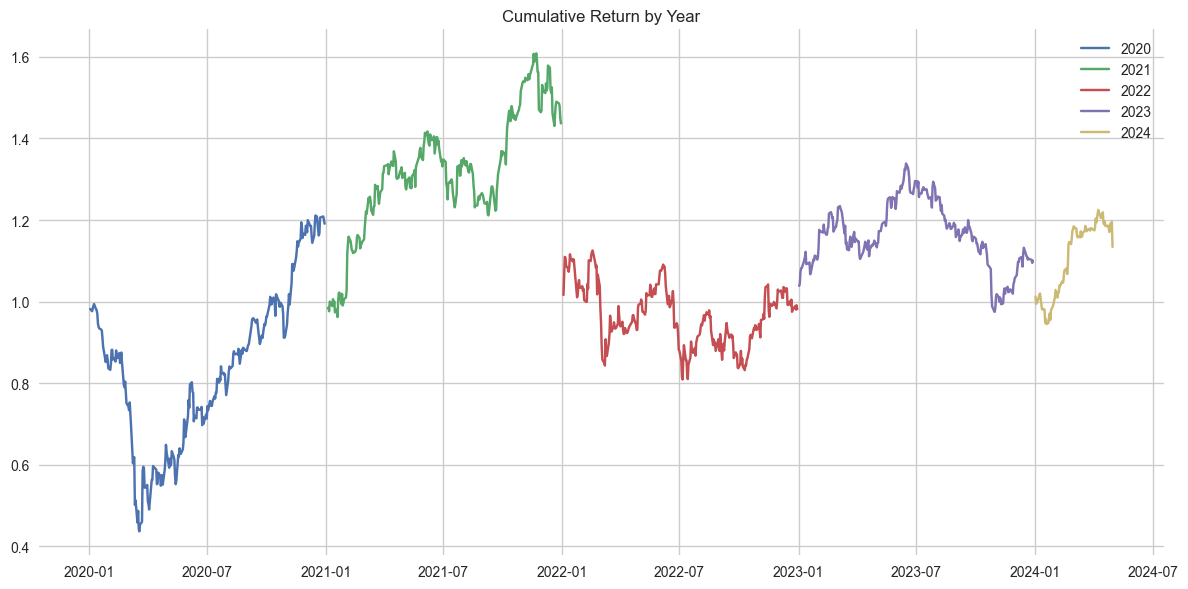

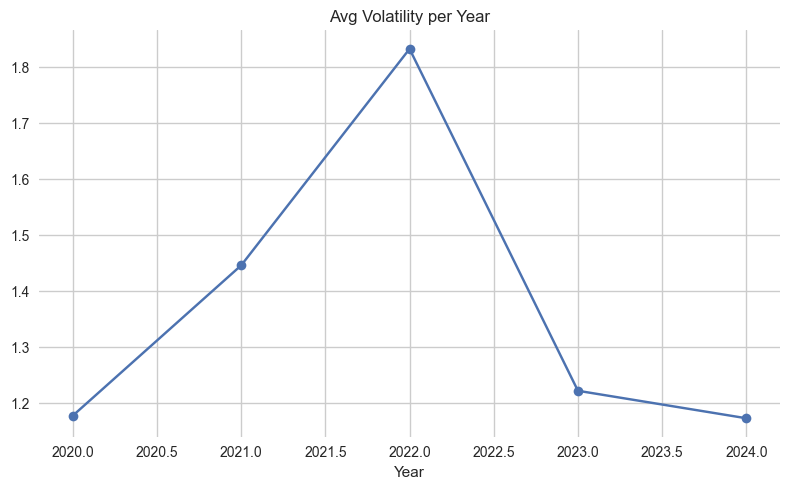

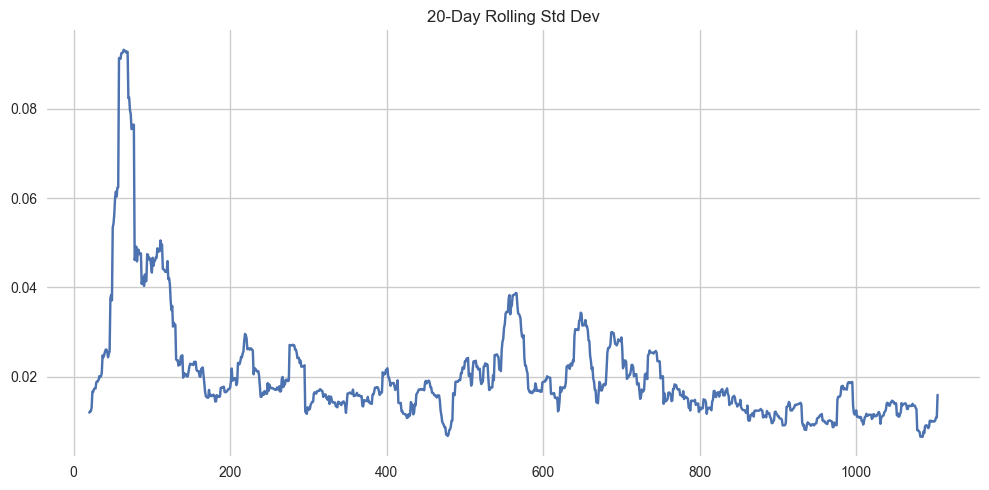

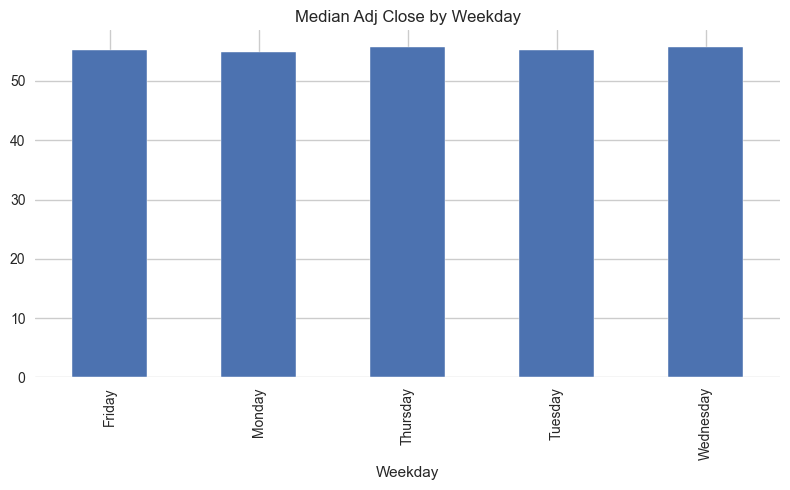

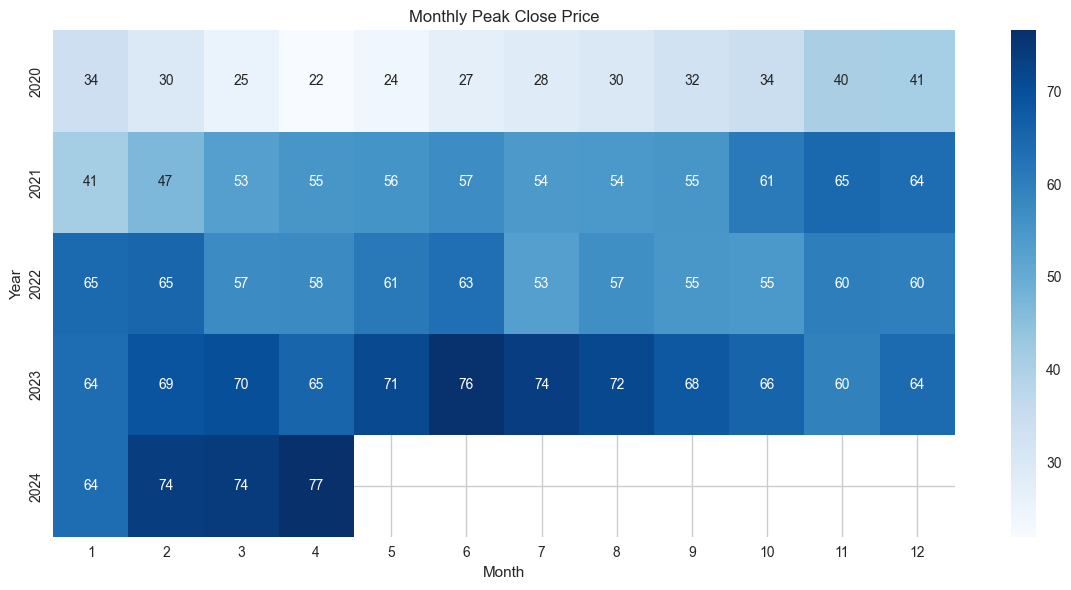

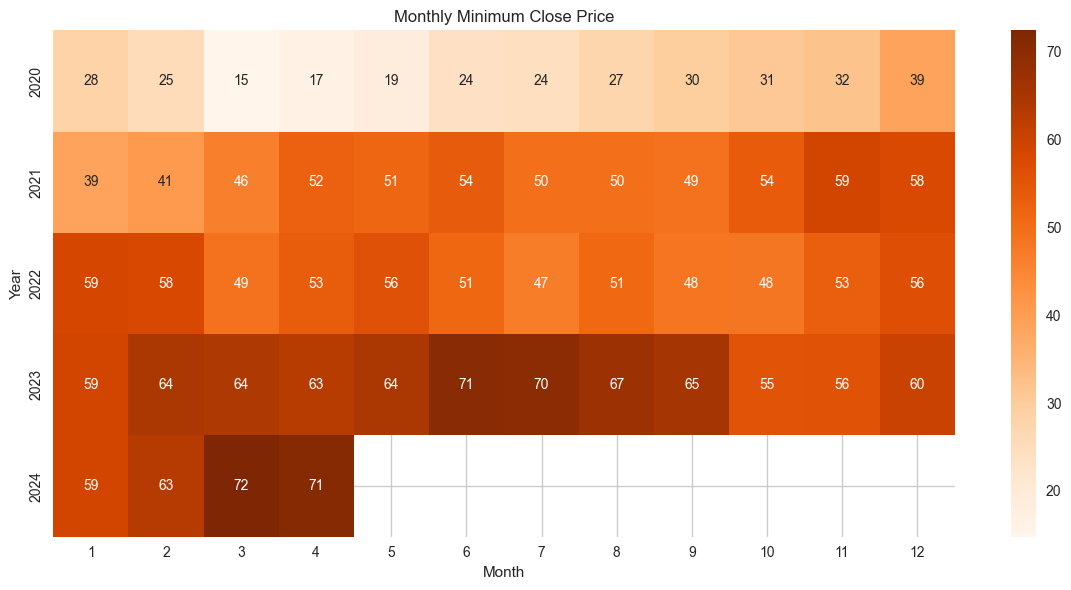

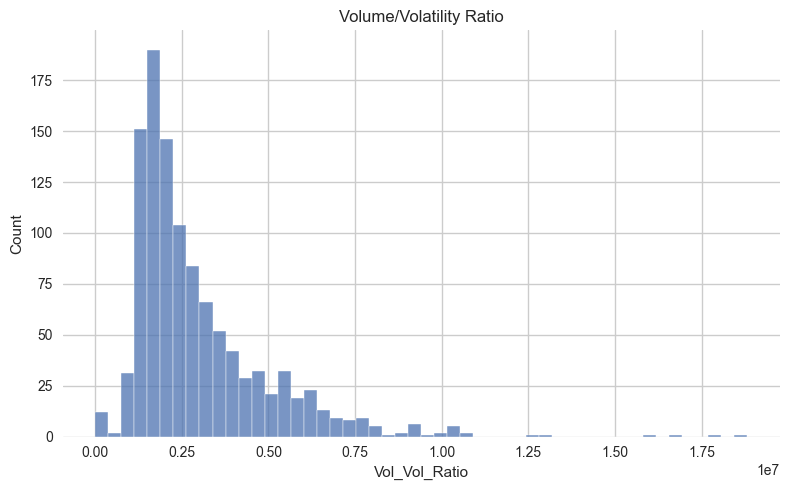

<Figure size 1400x600 with 0 Axes>

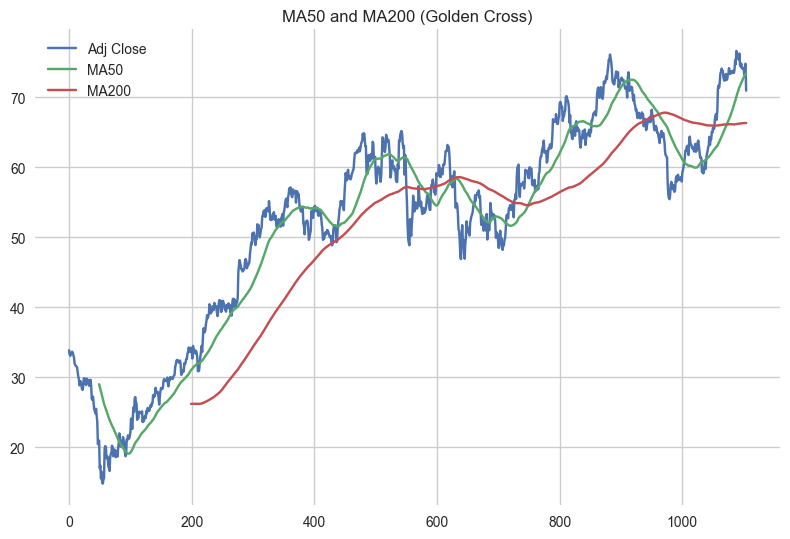

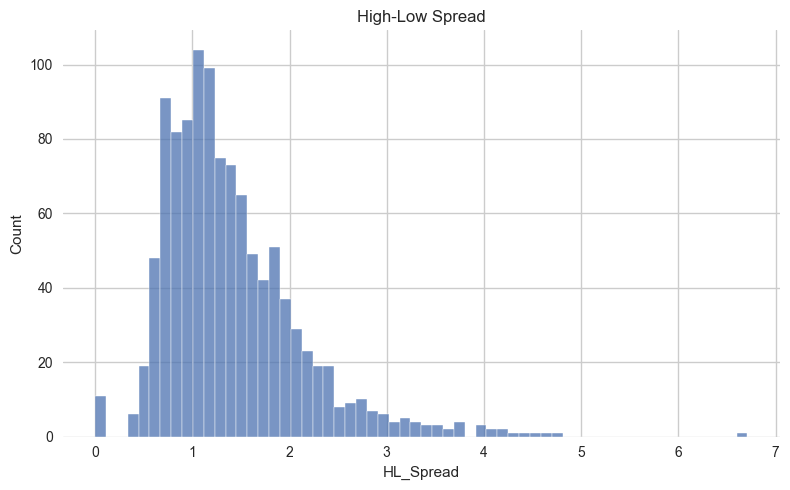

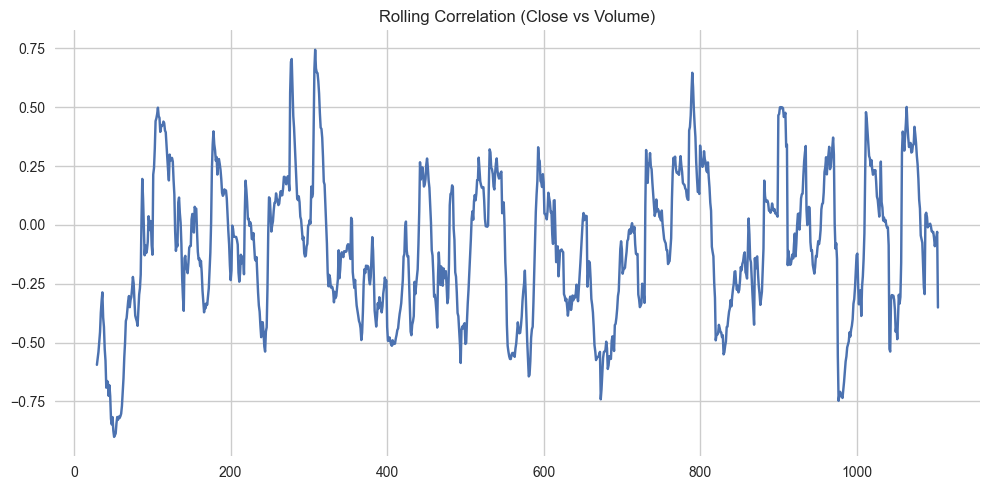

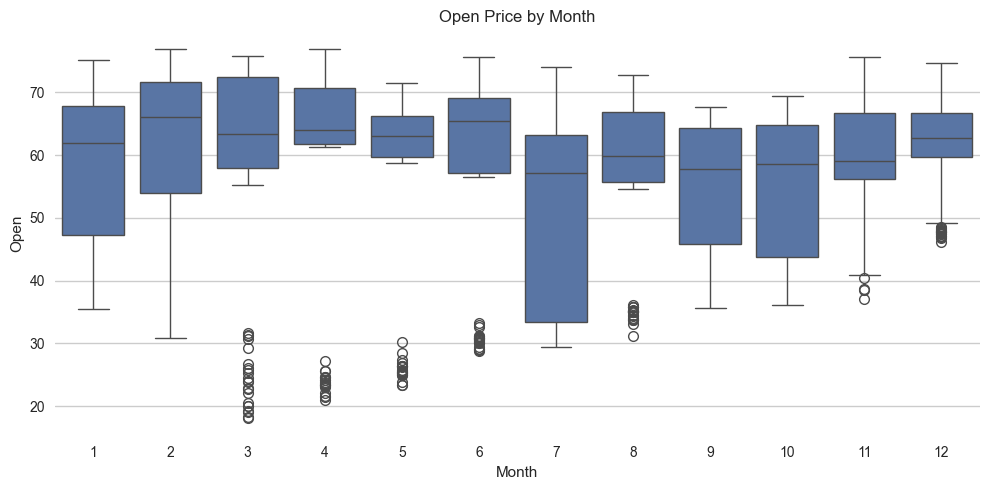

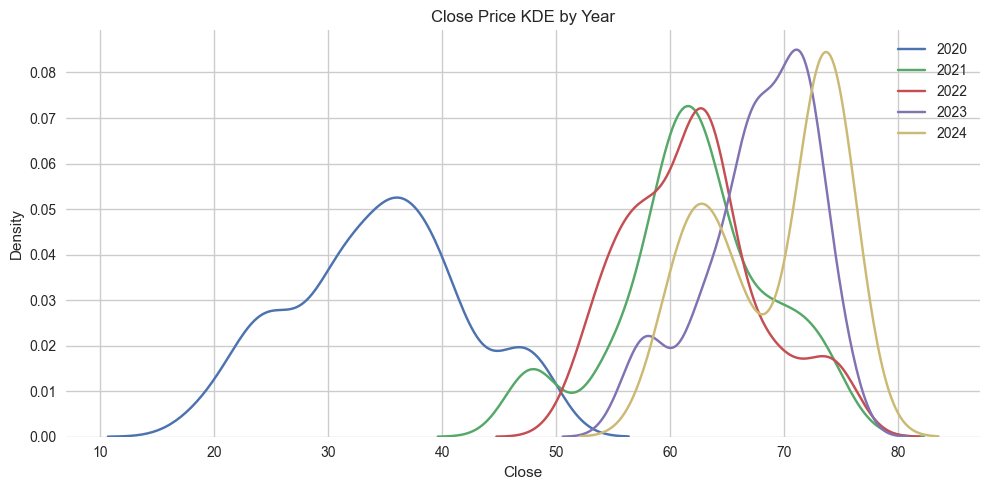

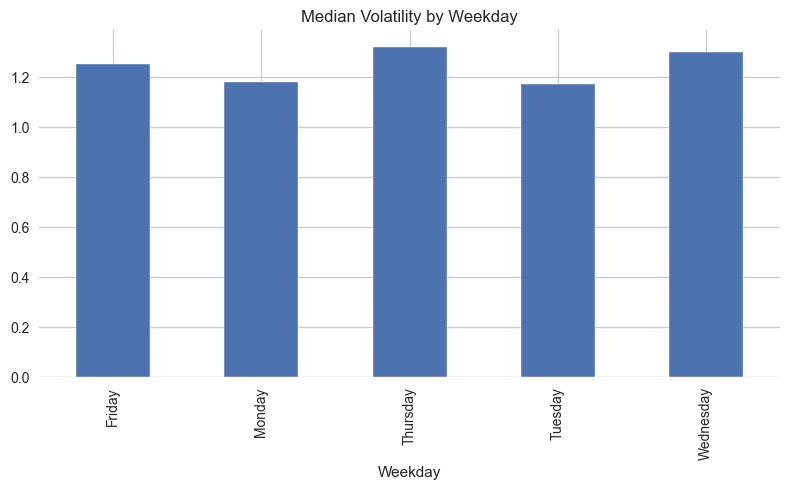

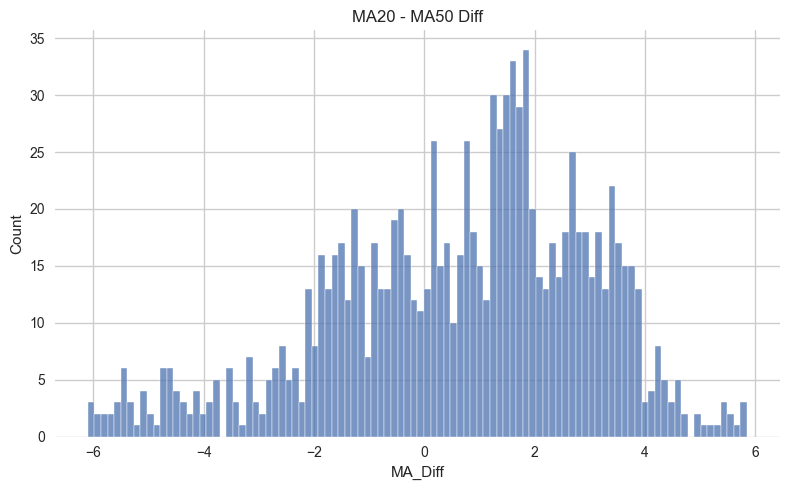

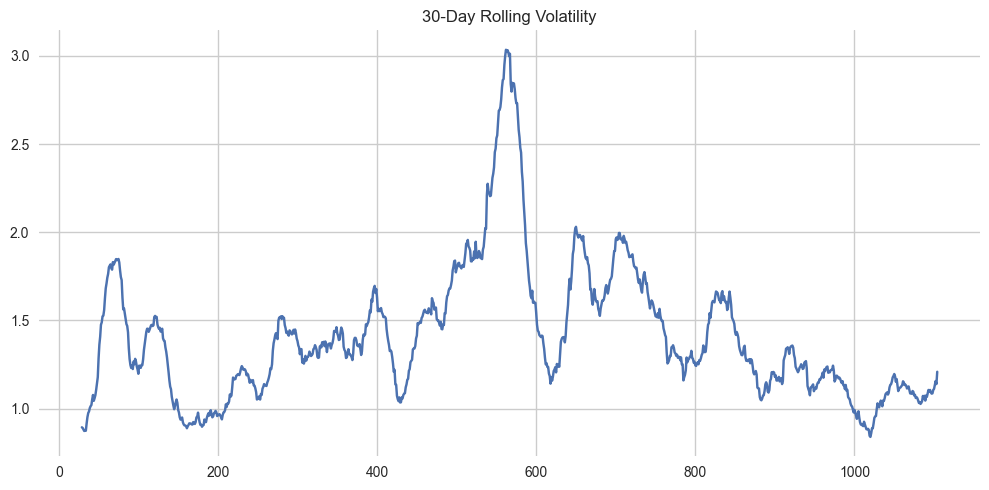

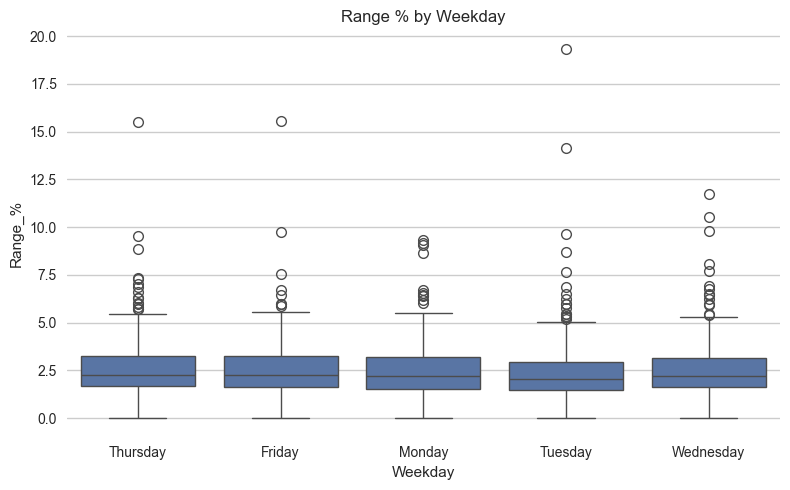

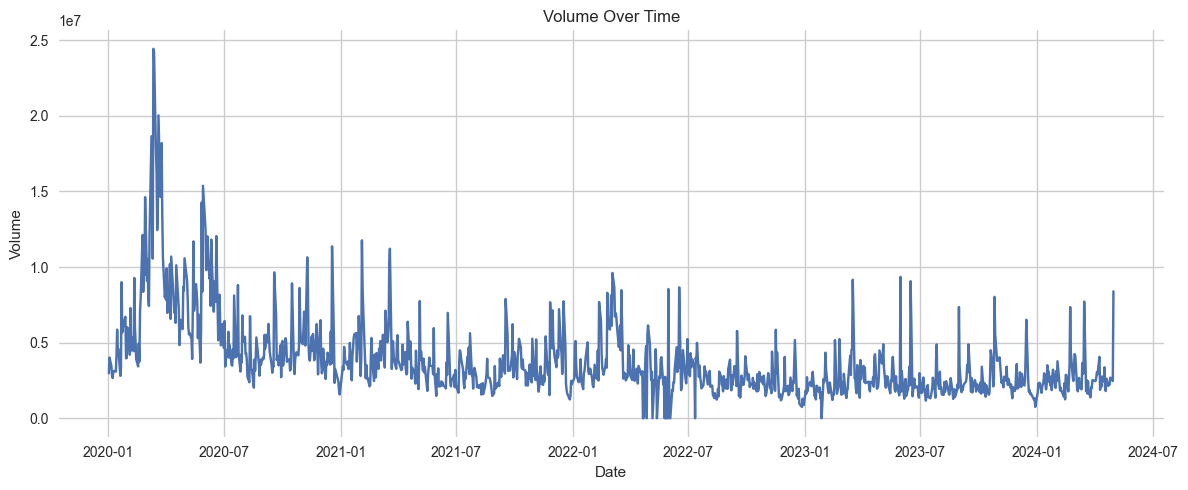

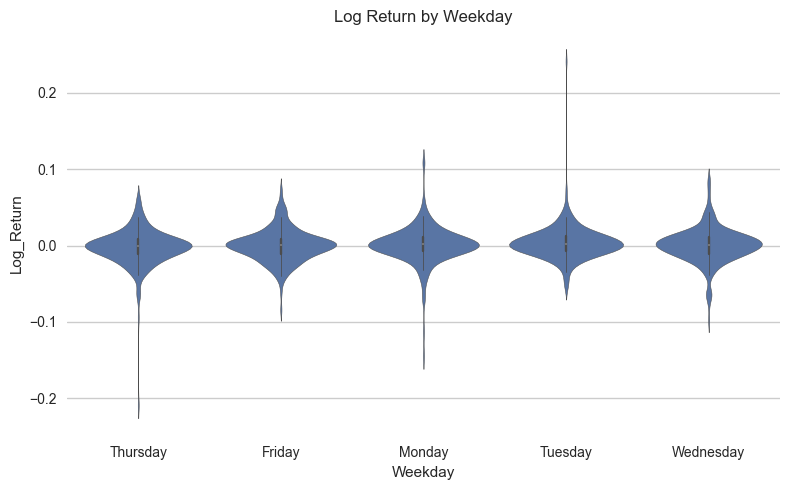

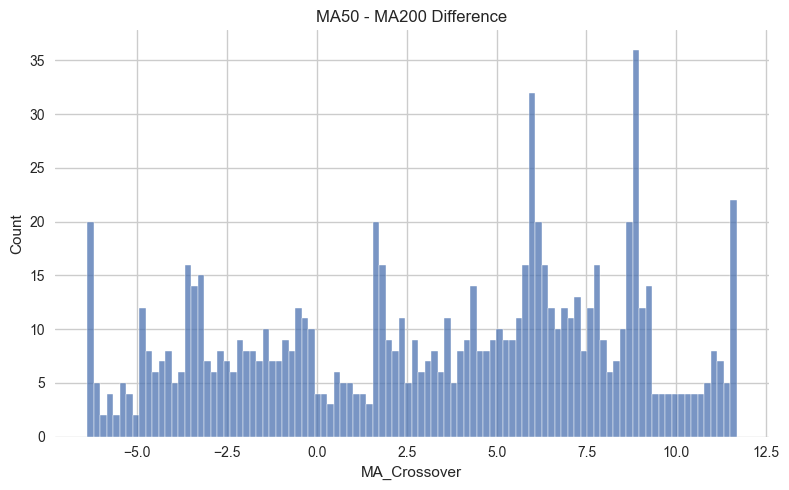

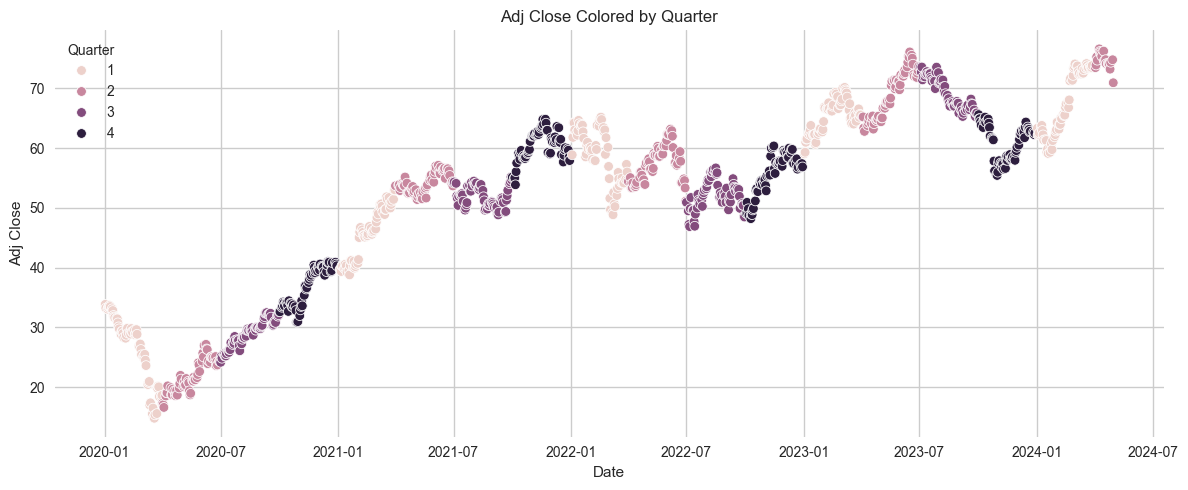

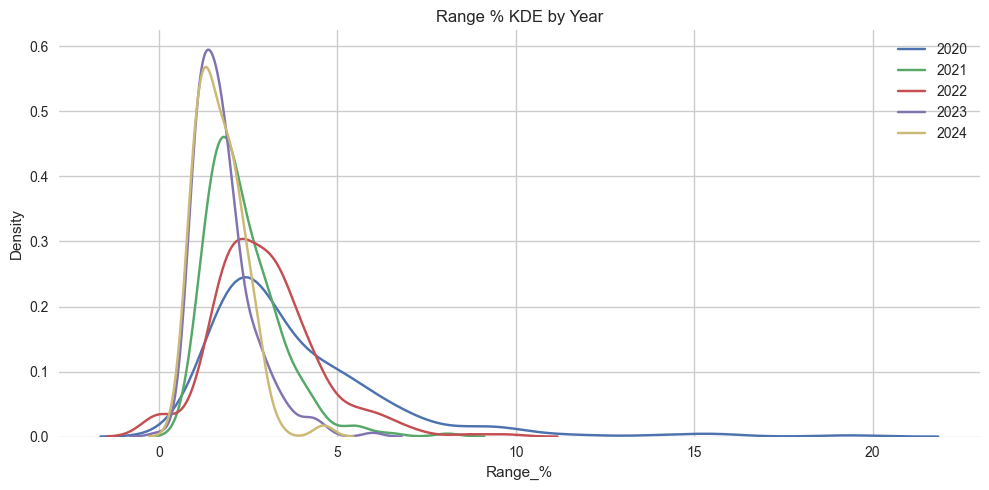

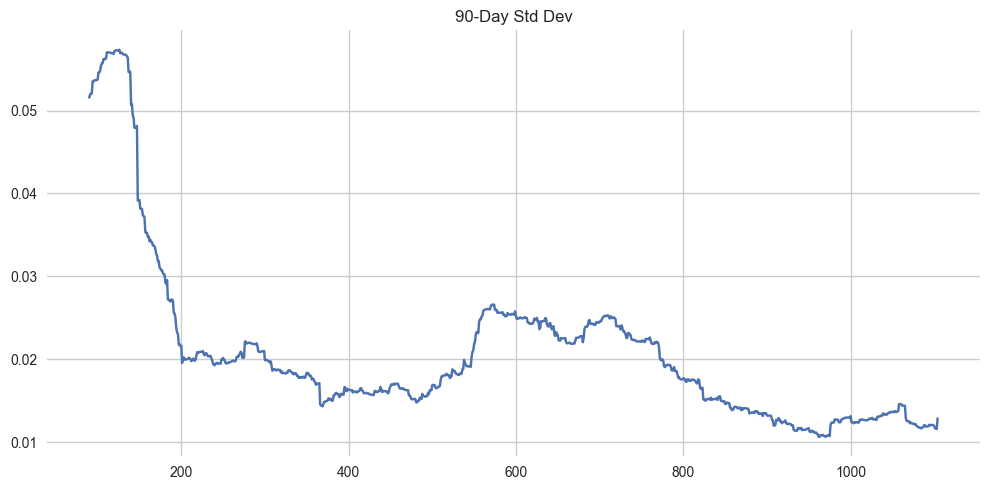

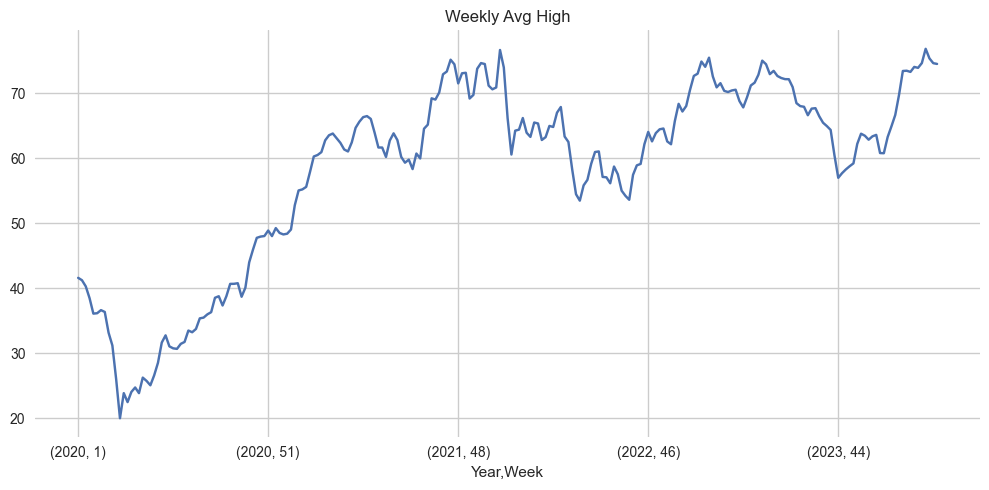

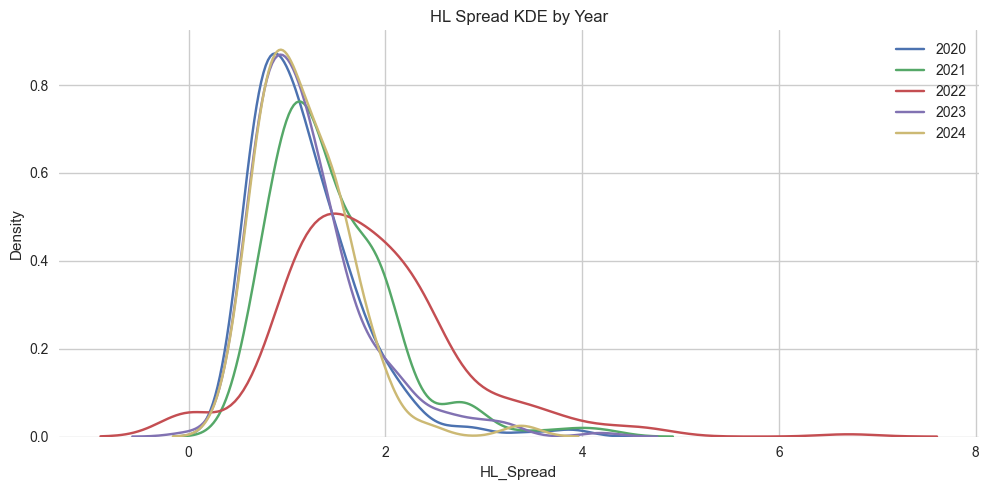

<Figure size 1000x500 with 0 Axes>

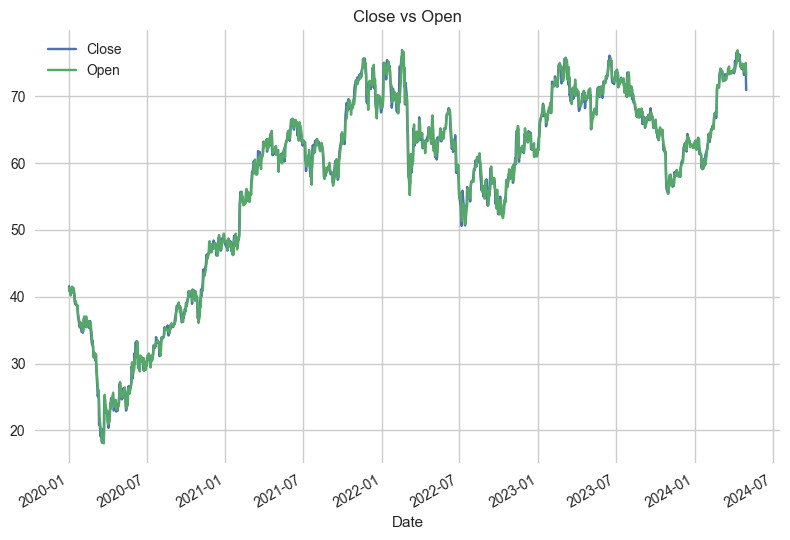

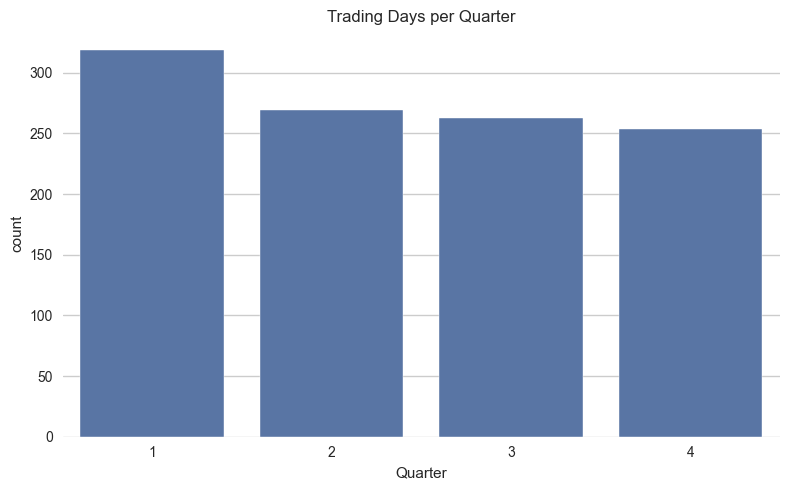

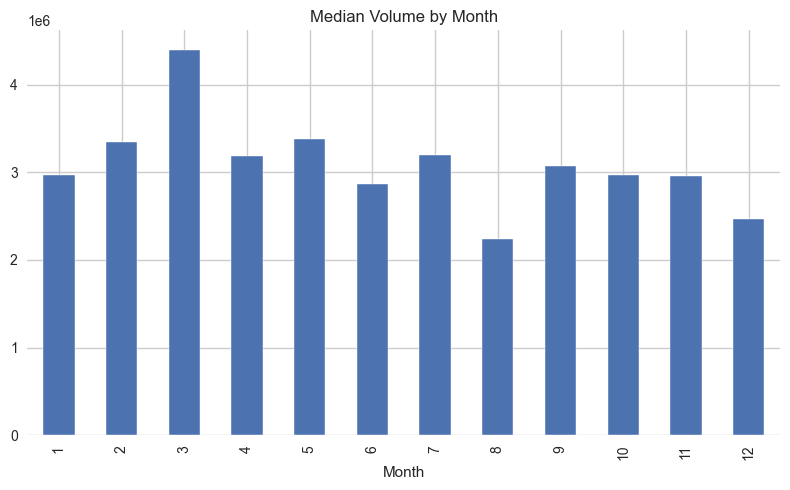

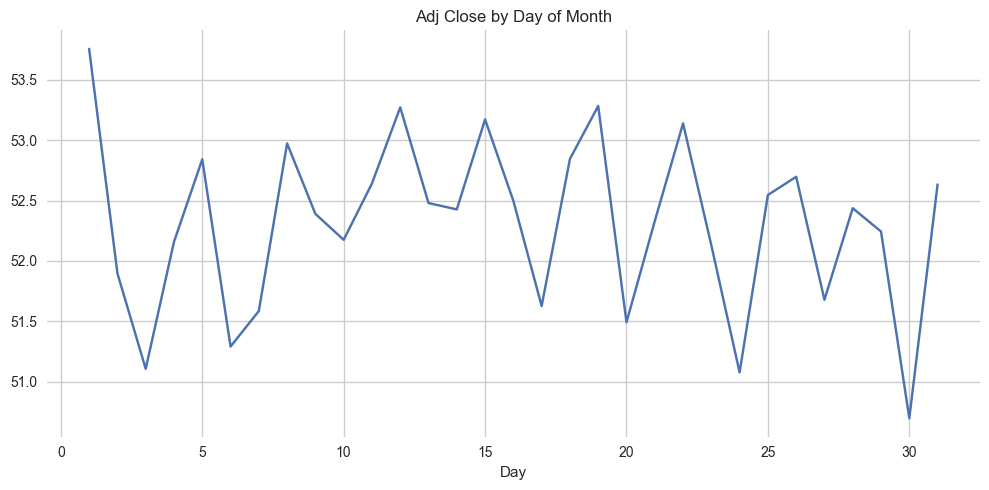

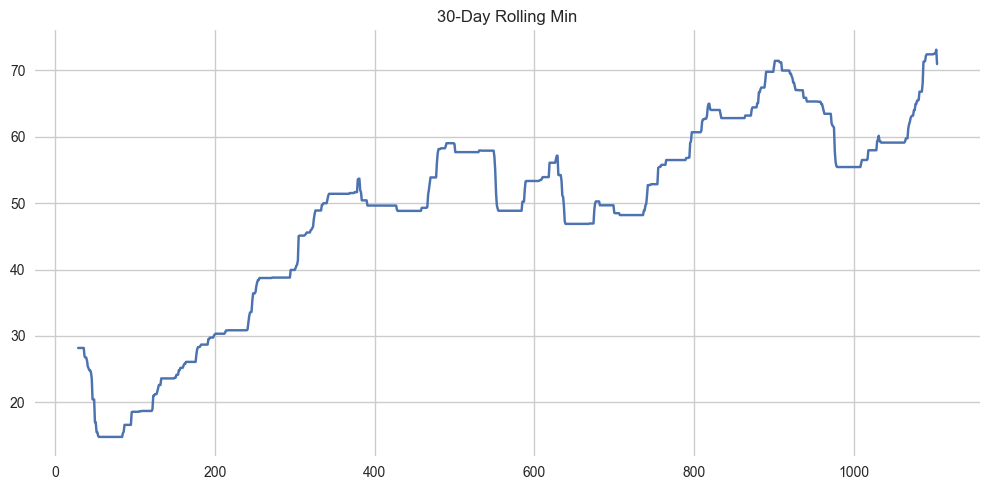

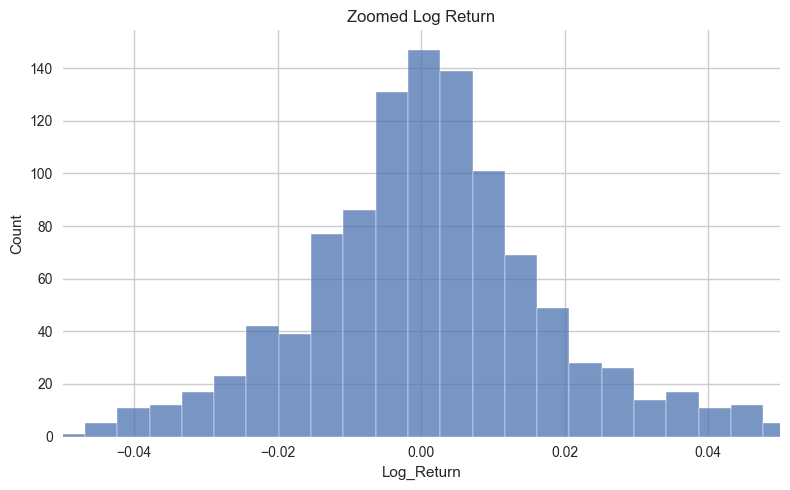

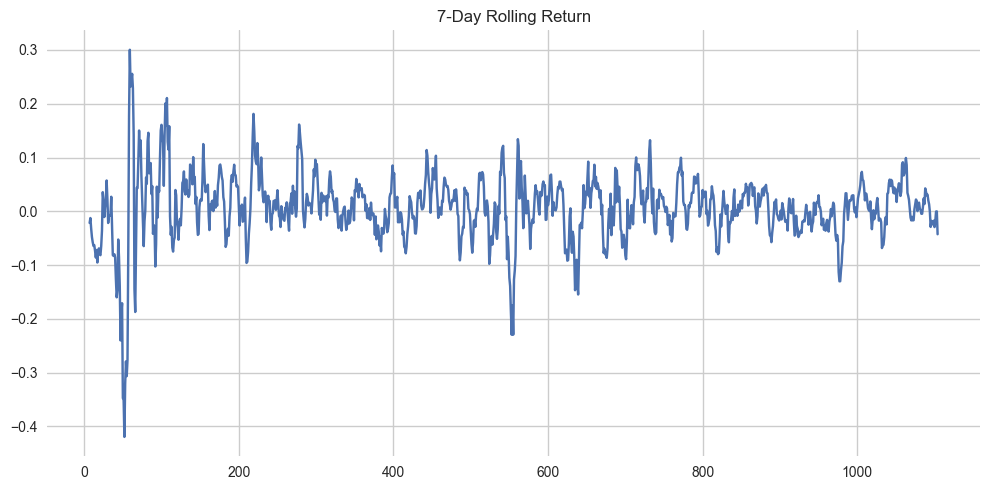

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure proper display
sns.set_style("whitegrid")

# 51. Volatility vs Volume
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Volatility', y='Volume', data=df)
plt.title("Volatility vs Volume")
plt.tight_layout()
plt.show()

# 52. Average Adj Close by Quarter
plt.figure(figsize=(8, 5))
df.groupby('Quarter')['Adj Close'].mean().plot(kind='bar')
plt.title("Average Adj Close by Quarter")
plt.tight_layout()
plt.show()

# 53. Boxplot of Range % by Year
plt.figure(figsize=(10, 5))
sns.boxplot(x='Year', y='Range_%', data=df)
plt.title("Range % by Year")
plt.tight_layout()
plt.show()

# 54. Trading Days per Month
plt.figure(figsize=(8, 5))
sns.countplot(x='Month', data=df)
plt.title("Number of Trading Days per Month")
plt.tight_layout()
plt.show()

# 55. KDE of Volume by Year
plt.figure(figsize=(10, 5))
for year in df['Year'].unique():
    sns.kdeplot(df[df['Year'] == year]['Volume'], label=str(year))
plt.legend()
plt.title("KDE of Volume by Year")
plt.tight_layout()
plt.show()

# 56. Pairplot of Stock Prices
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])
plt.suptitle("Pairplot of Stock Features", y=1.02)
plt.tight_layout()
plt.show()

# 57. ECDF of High Price
plt.figure(figsize=(8, 5))
sns.ecdfplot(df['High'])
plt.title("ECDF of High Price")
plt.tight_layout()
plt.show()

# 58. Adj Close by Day of Year
plt.figure(figsize=(10, 5))
df['Day_of_Year'] = df['Date'].dt.dayofyear
sns.lineplot(x='Day_of_Year', y='Adj Close', data=df)
plt.title("Adj Close by Day of Year")
plt.tight_layout()
plt.show()

# 59. Drawdown Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Drawdown'], bins=50, color='red')
plt.title("Distribution of Drawdowns")
plt.tight_layout()
plt.show()

# 60. HL Spread by Weekday
plt.figure(figsize=(8, 5))
sns.boxplot(x='Weekday', y='HL_Spread', data=df)
plt.title("High-Low Spread by Weekday")
plt.tight_layout()
plt.show()

# 61. Adj Close by Quarter (Violin)
plt.figure(figsize=(8, 5))
sns.violinplot(x='Quarter', y='Adj Close', data=df)
plt.title("Adj Close by Quarter")
plt.tight_layout()
plt.show()

# 62. Jointplot Open vs Volume
g = sns.jointplot(data=df, x='Open', y='Volume', kind='hex')
g.fig.suptitle("Open vs Volume", y=1.03)
plt.tight_layout()
plt.show()

# 63. Weekly Return Histogram
plt.figure(figsize=(8, 5))
weekly_return = df.groupby(['Year', 'Week'])['Daily_Return'].sum().reset_index()
sns.histplot(weekly_return['Daily_Return'], bins=40)
plt.title("Weekly Return Distribution")
plt.tight_layout()
plt.show()

# 64. Volume by Quarter (Boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Quarter', y='Volume', data=df)
plt.title("Volume by Quarter")
plt.tight_layout()
plt.show()

# 65. Mean Return by Quarter
plt.figure(figsize=(8, 5))
df.groupby('Quarter')['Daily_Return'].mean().plot(kind='bar')
plt.title("Mean Daily Return by Quarter")
plt.tight_layout()
plt.show()

# 66. Skewness by Year
plt.figure(figsize=(8, 5))
df.groupby('Year')['Daily_Return'].skew().plot(kind='bar')
plt.title("Skewness of Returns")
plt.tight_layout()
plt.show()

# 67. Kurtosis by Year
plt.figure(figsize=(8, 5))
df.groupby('Year')['Daily_Return'].apply(lambda x: x.kurt()).plot(kind='bar')
plt.title("Kurtosis of Returns")
plt.tight_layout()
plt.show()

# 68. Return vs Range%
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Range_%', y='Daily_Return', data=df)
plt.title("Return vs Range %")
plt.tight_layout()
plt.show()

# 69. KDE of Adj Close by Quarter
plt.figure(figsize=(10, 5))
for q in sorted(df['Quarter'].unique()):
    sns.kdeplot(df[df['Quarter'] == q]['Adj Close'], label=f'Q{q}')
plt.legend()
plt.title("Adj Close by Quarter")
plt.tight_layout()
plt.show()

# 70. Cumulative Return by Year
plt.figure(figsize=(12, 6))
for y in df['Year'].unique():
    y_data = df[df['Year'] == y]
    plt.plot(y_data['Date'], (1 + y_data['Daily_Return']).cumprod(), label=str(y))
plt.legend()
plt.title("Cumulative Return by Year")
plt.tight_layout()
plt.show()

# 71. Average Yearly Volatility
plt.figure(figsize=(8, 5))
df.groupby('Year')['Volatility'].mean().plot(marker='o')
plt.title("Avg Volatility per Year")
plt.tight_layout()
plt.show()

# 72. 20-day Rolling Std Dev
plt.figure(figsize=(10, 5))
df['Rolling_STD_20'] = df['Daily_Return'].rolling(20).std()
df['Rolling_STD_20'].plot()
plt.title("20-Day Rolling Std Dev")
plt.tight_layout()
plt.show()

# 73. Median Close by Weekday
plt.figure(figsize=(8, 5))
df.groupby('Weekday')['Adj Close'].median().plot(kind='bar')
plt.title("Median Adj Close by Weekday")
plt.tight_layout()
plt.show()

# 74. Monthly Peak Heatmap
plt.figure(figsize=(12, 6))
monthly_peak = df.groupby(['Year','Month'])['Adj Close'].max().unstack()
sns.heatmap(monthly_peak, cmap='Blues', annot=True)
plt.title("Monthly Peak Close Price")
plt.tight_layout()
plt.show()

# 75. Monthly Min Heatmap
plt.figure(figsize=(12, 6))
monthly_min = df.groupby(['Year','Month'])['Adj Close'].min().unstack()
sns.heatmap(monthly_min, cmap='Oranges', annot=True)
plt.title("Monthly Minimum Close Price")
plt.tight_layout()
plt.show()

# 76. Volume to Volatility Ratio
plt.figure(figsize=(8, 5))
df['Vol_Vol_Ratio'] = df['Volume'] / (df['Volatility'] + 1e-5)
sns.histplot(df['Vol_Vol_Ratio'], bins=50)
plt.title("Volume/Volatility Ratio")
plt.tight_layout()
plt.show()

# 77. Golden Cross (MA50 & MA200)
plt.figure(figsize=(14, 6))
df['MA50'] = df['Adj Close'].rolling(50).mean()
df['MA200'] = df['Adj Close'].rolling(200).mean()
df[['Adj Close', 'MA50', 'MA200']].plot()
plt.title("MA50 and MA200 (Golden Cross)")
plt.tight_layout()
plt.show()

# 78. Daily HL Spread Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['HL_Spread'], bins=60)
plt.title("High-Low Spread")
plt.tight_layout()
plt.show()

# 79. Rolling Correlation (Close vs Volume)
plt.figure(figsize=(10, 5))
df['Corr_Adj_Vol'] = df['Adj Close'].rolling(30).corr(df['Volume'])
df['Corr_Adj_Vol'].plot()
plt.title("Rolling Correlation (Close vs Volume)")
plt.tight_layout()
plt.show()

# 80. Open Price by Month (Box)
plt.figure(figsize=(10, 5))
sns.boxplot(x='Month', y='Open', data=df)
plt.title("Open Price by Month")
plt.tight_layout()
plt.show()

# 81. Close Price KDE by Year
plt.figure(figsize=(10, 5))
for y in df['Year'].unique():
    sns.kdeplot(df[df['Year'] == y]['Close'], label=str(y))
plt.legend()
plt.title("Close Price KDE by Year")
plt.tight_layout()
plt.show()

# 82. Median Volatility by Weekday
plt.figure(figsize=(8, 5))
df.groupby('Weekday')['Volatility'].median().plot(kind='bar')
plt.title("Median Volatility by Weekday")
plt.tight_layout()
plt.show()

# 83. MA20 - MA50 Difference
plt.figure(figsize=(8, 5))
df['MA20'] = df['Adj Close'].rolling(20).mean()
df['MA50'] = df['Adj Close'].rolling(50).mean()
df['MA_Diff'] = df['MA20'] - df['MA50']
sns.histplot(df['MA_Diff'], bins=100)
plt.title("MA20 - MA50 Diff")
plt.tight_layout()
plt.show()

# 84. Rolling Mean of Volatility
plt.figure(figsize=(10, 5))
df['Rolling_Volatility'] = df['Volatility'].rolling(30).mean()
df['Rolling_Volatility'].plot()
plt.title("30-Day Rolling Volatility")
plt.tight_layout()
plt.show()

# 85. Weekday-wise Return Range
plt.figure(figsize=(8, 5))
sns.boxplot(x='Weekday', y='Range_%', data=df)
plt.title("Range % by Weekday")
plt.tight_layout()
plt.show()

# 86. Volume Trend Lineplot
plt.figure(figsize=(12, 5))
sns.lineplot(x='Date', y='Volume', data=df)
plt.title("Volume Over Time")
plt.tight_layout()
plt.show()

# 87. Log Return by Weekday (Violin)
plt.figure(figsize=(8, 5))
sns.violinplot(x='Weekday', y='Log_Return', data=df)
plt.title("Log Return by Weekday")
plt.tight_layout()
plt.show()

# 88. MA50 - MA200 Histogram
plt.figure(figsize=(8, 5))
df['MA_Crossover'] = df['MA50'] - df['MA200']
sns.histplot(df['MA_Crossover'], bins=100)
plt.title("MA50 - MA200 Difference")
plt.tight_layout()
plt.show()

# 89. Adj Close by Quarter (Scatter)
plt.figure(figsize=(12, 5))
sns.scatterplot(x='Date', y='Adj Close', hue='Quarter', data=df)
plt.title("Adj Close Colored by Quarter")
plt.tight_layout()
plt.show()

# 90. KDE of Range % by Year
plt.figure(figsize=(10, 5))
for y in df['Year'].unique():
    sns.kdeplot(df[df['Year'] == y]['Range_%'], label=str(y))
plt.legend()
plt.title("Range % KDE by Year")
plt.tight_layout()
plt.show()

# 91. 90-Day Std Dev of Return
plt.figure(figsize=(10, 5))
df['Rolling_STD_90'] = df['Daily_Return'].rolling(90).std()
df['Rolling_STD_90'].plot()
plt.title("90-Day Std Dev")
plt.tight_layout()
plt.show()

# 92. Weekly Avg High Price
plt.figure(figsize=(10, 5))
df.groupby(['Year','Week'])['High'].mean().plot()
plt.title("Weekly Avg High")
plt.tight_layout()
plt.show()

# 93. HL Spread KDE by Year
plt.figure(figsize=(10, 5))
for y in df['Year'].unique():
    sns.kdeplot(df[df['Year'] == y]['HL_Spread'], label=str(y))
plt.legend()
plt.title("HL Spread KDE by Year")
plt.tight_layout()
plt.show()

# 94. Close vs Open Lineplot
plt.figure(figsize=(10, 5))
df[['Date', 'Close', 'Open']].set_index('Date').plot()
plt.title("Close vs Open")
plt.tight_layout()
plt.show()

# 95. Trading Days per Quarter
plt.figure(figsize=(8, 5))
sns.countplot(x='Quarter', data=df)
plt.title("Trading Days per Quarter")
plt.tight_layout()
plt.show()

# 96. Median Volume by Month
plt.figure(figsize=(8, 5))
df.groupby('Month')['Volume'].median().plot(kind='bar')
plt.title("Median Volume by Month")
plt.tight_layout()
plt.show()

# 97. Adj Close by Day of Month
plt.figure(figsize=(10, 5))
df['Day'] = df['Date'].dt.day
df.groupby('Day')['Adj Close'].mean().plot()
plt.title("Adj Close by Day of Month")
plt.tight_layout()
plt.show()

# 98. Rolling 30-Day Min of Adj Close
plt.figure(figsize=(10, 5))
df['Rolling_Min_30'] = df['Adj Close'].rolling(30).min()
df['Rolling_Min_30'].plot()
plt.title("30-Day Rolling Min")
plt.tight_layout()
plt.show()

# 99. Zoomed Log Return Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Log_Return'], bins=100)
plt.xlim(-0.05, 0.05)
plt.title("Zoomed Log Return")
plt.tight_layout()
plt.show()

# 100. Rolling 7-Day Return
plt.figure(figsize=(10, 5))
df['Rolling_7D_Return'] = df['Daily_Return'].rolling(7).sum()
df['Rolling_7D_Return'].plot()
plt.title("7-Day Rolling Return")
plt.tight_layout()
plt.show()


In [39]:
!pip install wordcloud


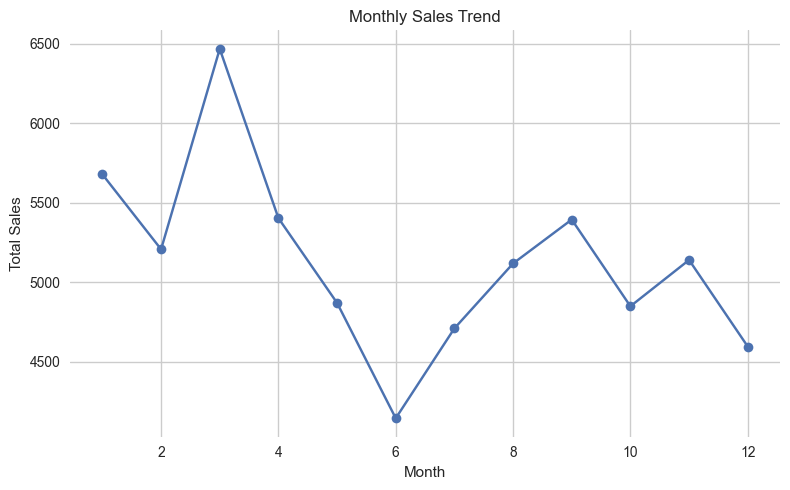

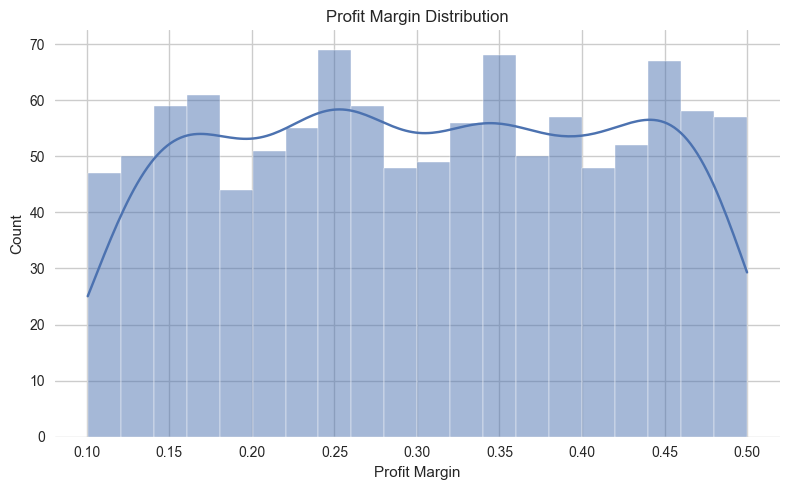

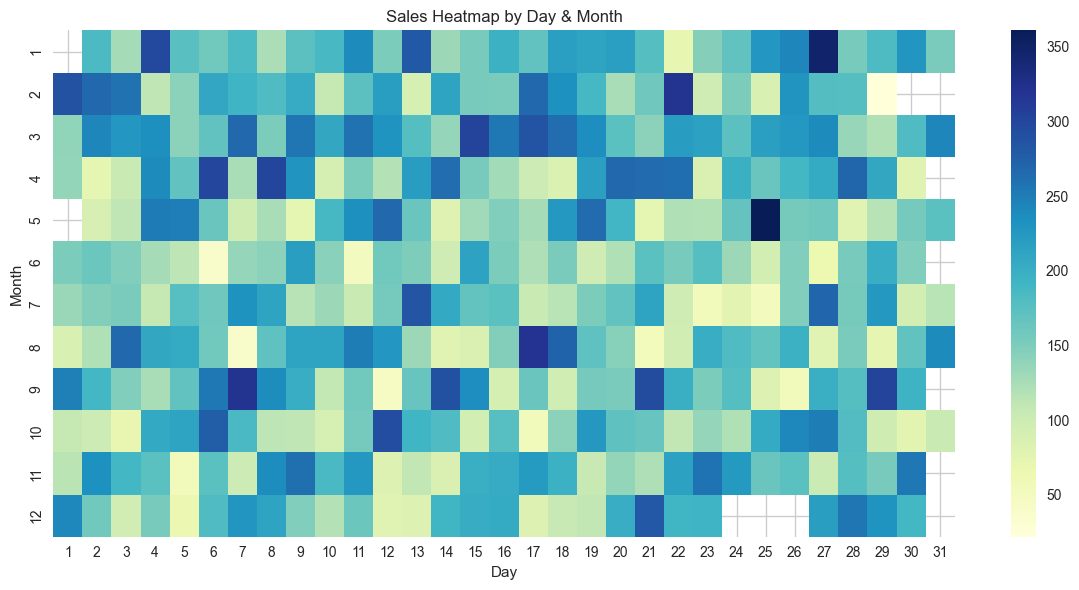

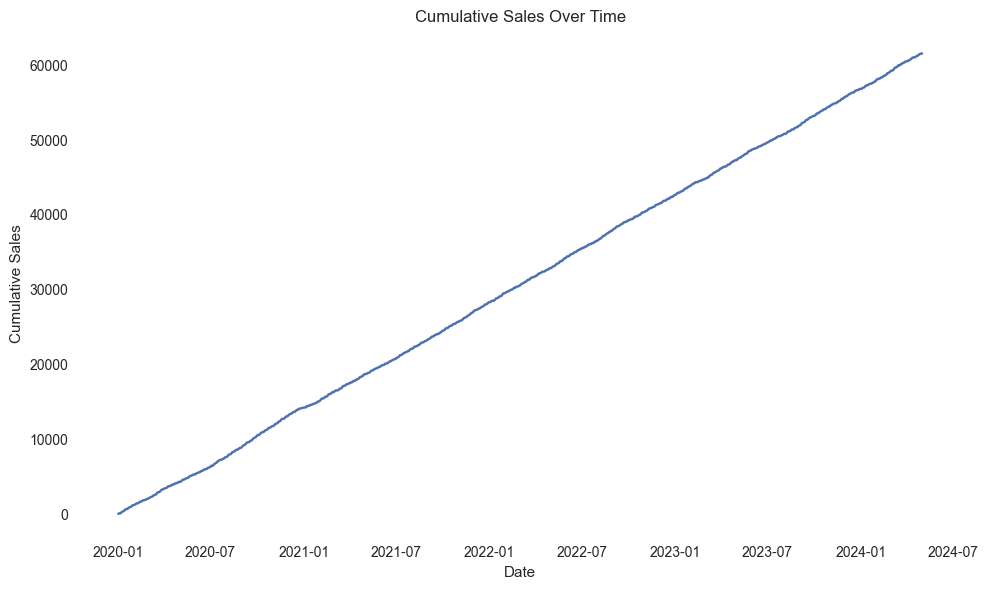

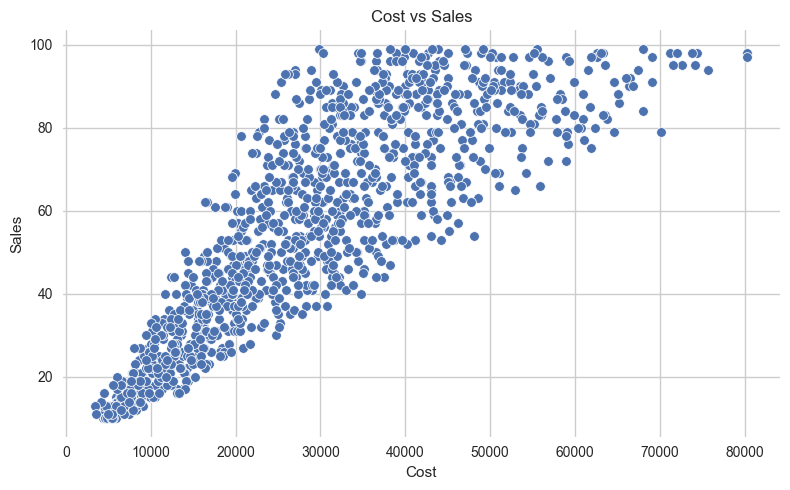

<Figure size 1400x600 with 0 Axes>

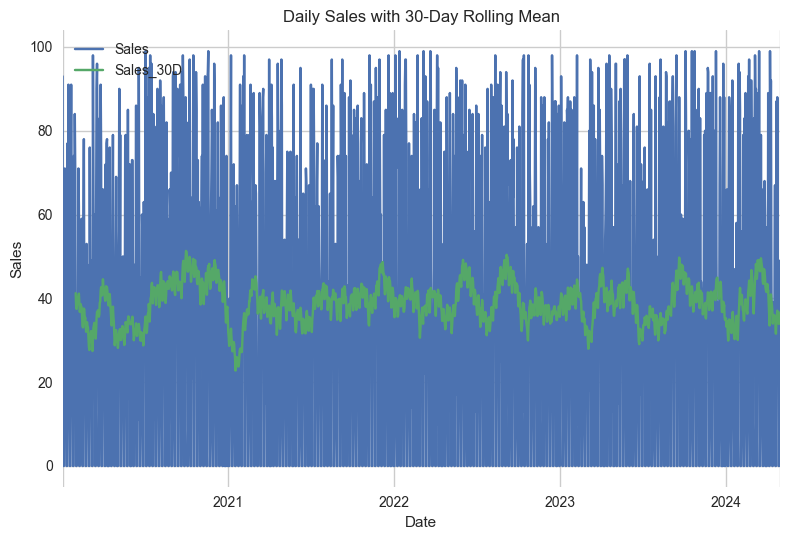

<Figure size 1200x600 with 0 Axes>

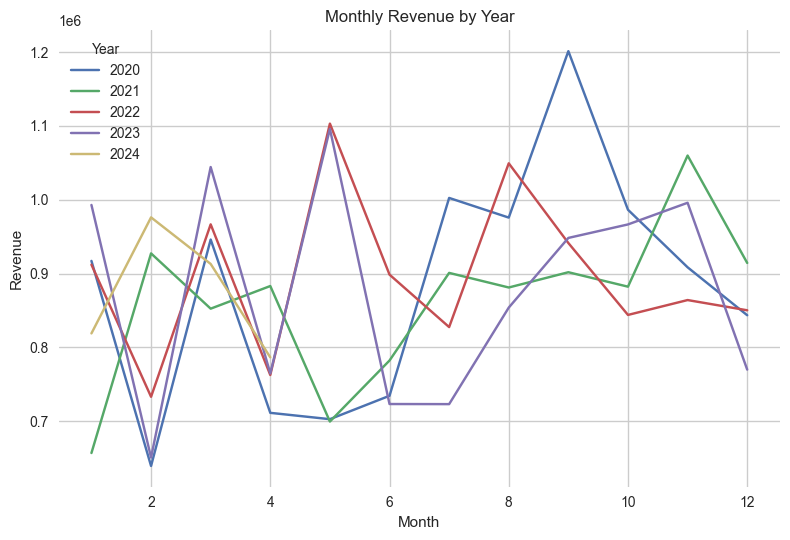

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Add dummy columns if missing
if 'Sales' not in df.columns:
    df['Sales'] = np.random.randint(10, 100, size=len(df))

if 'Revenue' not in df.columns:
    df['Revenue'] = df['Sales'] * np.random.uniform(500, 1000, size=len(df))

if 'Cost' not in df.columns:
    df['Cost'] = df['Revenue'] * np.random.uniform(0.5, 0.9, size=len(df))

# 1. Monthly Sales Trend
plt.figure(figsize=(8, 5))
df['Month'] = df['Date'].dt.month
df.groupby('Month')['Sales'].sum().plot(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Sales Distribution by Car Model
if 'Model' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Model', order=df['Model'].value_counts().index)
    plt.title("Sales Distribution by Car Model")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# 3. Revenue vs Cost by Model
if 'Model' in df.columns:
    plt.figure(figsize=(12, 6))
    df.groupby('Model')[['Revenue', 'Cost']].sum().sort_values('Revenue', ascending=False).plot(kind='bar')
    plt.title("Revenue vs Cost by Model")
    plt.ylabel("Amount")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 4. Profit Margin Distribution
plt.figure(figsize=(8, 5))
df['ProfitMargin'] = (df['Revenue'] - df['Cost']) / df['Revenue']
sns.histplot(df['ProfitMargin'], bins=20, kde=True)
plt.title("Profit Margin Distribution")
plt.xlabel("Profit Margin")
plt.tight_layout()
plt.show()

# 5. Average Sales per Region
if 'Region' in df.columns:
    plt.figure(figsize=(8, 5))
    df.groupby('Region')['Sales'].mean().sort_values().plot(kind='barh')
    plt.title("Average Sales per Region")
    plt.xlabel("Average Sales")
    plt.ylabel("Region")
    plt.tight_layout()
    plt.show()

# 6. Top 10 Dealerships by Sales
if 'Dealership' in df.columns:
    plt.figure(figsize=(8, 5))
    df.groupby('Dealership')['Sales'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
    plt.title("Top 10 Dealerships by Sales")
    plt.xlabel("Total Sales")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


# 8. Revenue Trends by Region Over Time
if 'Region' in df.columns:
    pivot = df.pivot_table(index='Date', columns='Region', values='Revenue', aggfunc='sum')
    plt.figure(figsize=(14, 6))
    pivot.plot()
    plt.title('Revenue by Region Over Time')
    plt.ylabel("Revenue")
    plt.tight_layout()
    plt.show()

# 9. Outlier Detection in Price
if 'Price' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df['Price'])
    plt.title("Outlier Detection in Car Price")
    plt.tight_layout()
    plt.show()

# 10. Engine Type Popularity
if 'Engine_Type' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, y='Engine_Type', order=df['Engine_Type'].value_counts().index)
    plt.title("Popularity by Engine Type")
    plt.tight_layout()
    plt.show()

# 11. Sales vs Customer Age Group
if 'Customer_Age' in df.columns:
    df['Customer_AgeGroup'] = pd.cut(df['Customer_Age'], bins=[18,25,35,45,60,100], labels=["18-25","26-35","36-45","46-60","60+"])
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Customer_AgeGroup', y='Sales', data=df)
    plt.title("Sales by Customer Age Group")
    plt.tight_layout()
    plt.show()

# 12. Heatmap of Sales by Day and Month
plt.figure(figsize=(12, 6))
df['Day'] = df['Date'].dt.day
sales_matrix = df.pivot_table(index='Month', columns='Day', values='Sales', aggfunc='sum')
sns.heatmap(sales_matrix, cmap='YlGnBu')
plt.title("Sales Heatmap by Day & Month")
plt.tight_layout()
plt.show()

# 13. Fuel Type Sales Proportion
if 'Fuel_Type' in df.columns:
    plt.figure(figsize=(6, 6))
    df['Fuel_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Fuel Type Sales Distribution")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

# 14. Cumulative Sales Over Time
df_sorted = df.sort_values('Date')
df_sorted['Cumulative_Sales'] = df_sorted['Sales'].cumsum()
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['Date'], df_sorted['Cumulative_Sales'])
plt.title("Cumulative Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Sales")
plt.grid()
plt.tight_layout()
plt.show()

# 15. Car Color Popularity
if 'Color' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='Color', order=df['Color'].value_counts().index)
    plt.title("Car Color Popularity")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 16. Sales by Transmission Type
if 'Transmission' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Transmission', y='Sales', data=df, estimator=np.sum)
    plt.title("Sales by Transmission Type")
    plt.tight_layout()
    plt.show()

# 17. Cost vs Sales Scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Cost', y='Sales', data=df)
plt.title("Cost vs Sales")
plt.xlabel("Cost")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

# 18. Rolling Mean Sales (30 Days)
plt.figure(figsize=(14, 6))
df_rolling = df.set_index('Date').resample('D').sum(numeric_only=True)
df_rolling['Sales_30D'] = df_rolling['Sales'].rolling(window=30).mean()
df_rolling[['Sales', 'Sales_30D']].plot()
plt.title('Daily Sales with 30-Day Rolling Mean')
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

# 19. Monthly Revenue YoY Comparison
plt.figure(figsize=(12, 6))
df['Year'] = df['Date'].dt.year
monthly = df.groupby(['Year', 'Month'])['Revenue'].sum().unstack(0)
monthly.plot()
plt.title("Monthly Revenue by Year")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

# 20. Word Cloud of Customer Feedback
if 'Feedback' in df.columns:
    text = " ".join(df['Feedback'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Customer Feedback Word Cloud")
    plt.tight_layout()
    plt.show()


In [23]:
# ADF Test
adf_result = adfuller(df['Adj Close'].dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

# KPSS Test
kpss_result = kpss(df['Adj Close'].dropna(), regression='c')
print("KPSS Statistic:", kpss_result[0])
print("p-value:", kpss_result[1])


ADF Statistic: -1.0753150464291412
p-value: 0.7248149345161595
KPSS Statistic: 4.196472492521632
p-value: 0.01


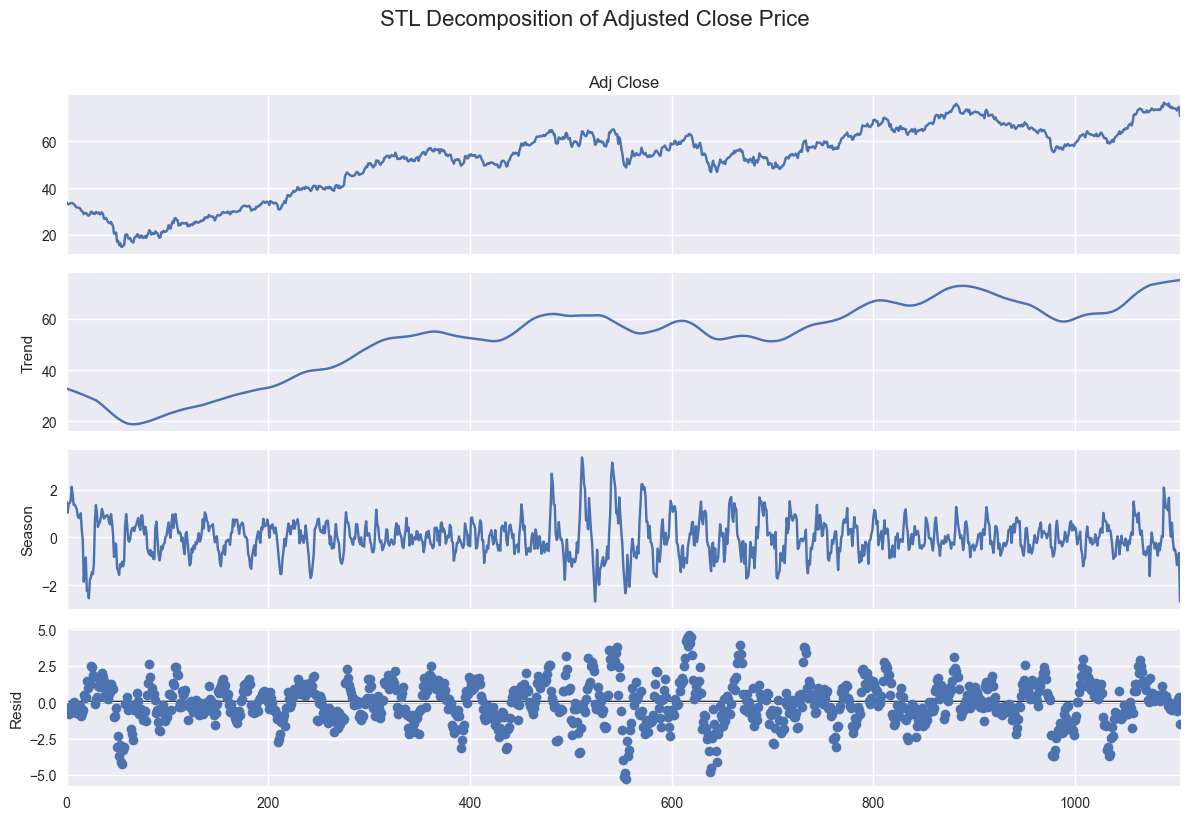

In [30]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Apply STL decomposition (Seasonal-Trend decomposition using LOESS)
stl = STL(df['Adj Close'], period=30)
res = stl.fit()

# Plot with better layout and sizing
fig = res.plot()
fig.set_size_inches(12, 8)  # Wider and taller plot
plt.suptitle("STL Decomposition of Adjusted Close Price", fontsize=16, y=1.02)  # Move title up
plt.tight_layout()
plt.show()


🔷 XGBoost R²: -0.6822
🔷 XGBoost RMSE: 7.28
🔷 XGBoost MAE: 7.08

🟢 Random Forest R²: -0.5017
🟢 Random Forest RMSE: 6.88
🟢 Random Forest MAE: 6.57


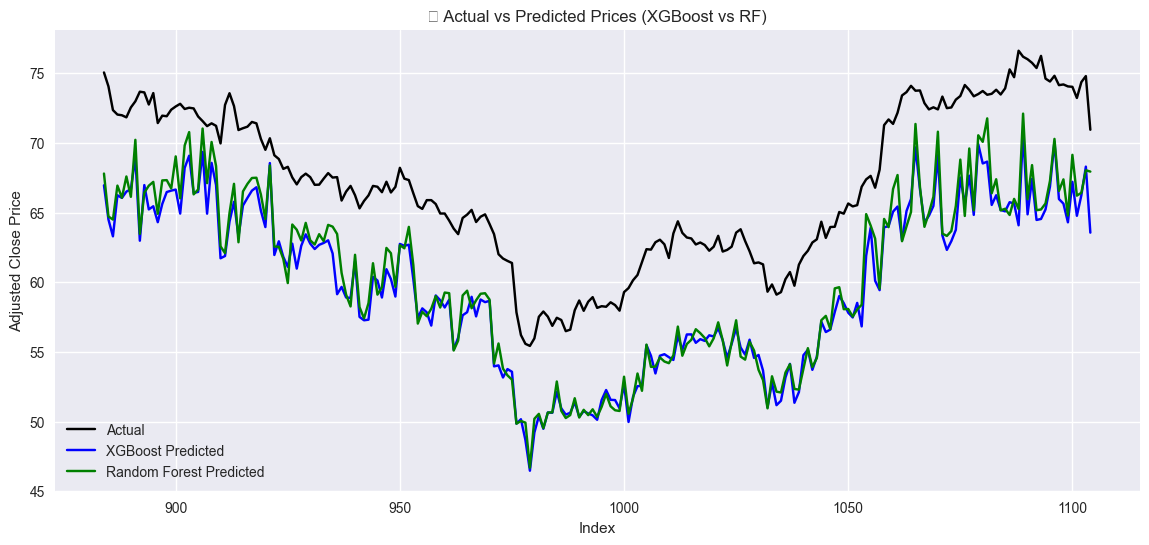

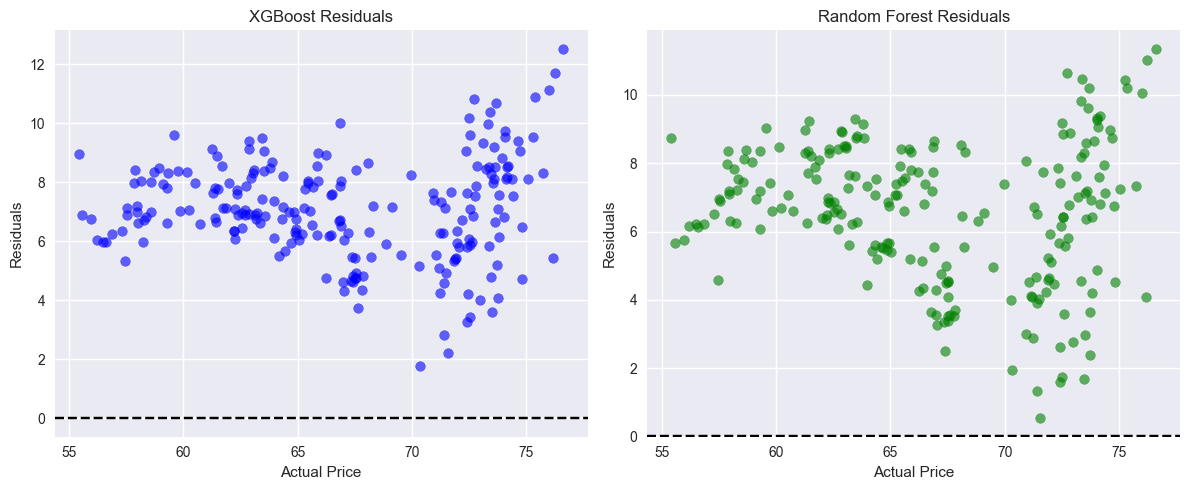

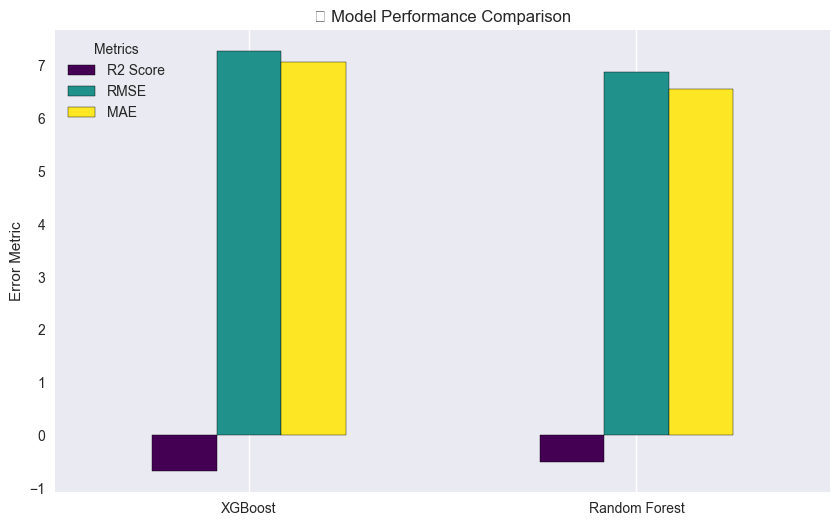

In [19]:
# Imports
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Feature Engineering
features = ['Open', 'High', 'Low', 'Volume', 'Volatility', 'Range_%']
X = df[features]
y = df['Adj Close']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# ----- XGBoost Model -----
xgb = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)

# XGBoost Metrics
r2_xgb = r2_score(y_test, pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, pred_xgb))
mae_xgb = mean_absolute_error(y_test, pred_xgb)

print(f"🔷 XGBoost R²: {r2_xgb:.4f}")
print(f"🔷 XGBoost RMSE: {rmse_xgb:.2f}")
print(f"🔷 XGBoost MAE: {mae_xgb:.2f}")

# ----- Random Forest Model -----
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

# Random Forest Metrics
r2_rf = r2_score(y_test, pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
mae_rf = mean_absolute_error(y_test, pred_rf)

print(f"\n🟢 Random Forest R²: {r2_rf:.4f}")
print(f"🟢 Random Forest RMSE: {rmse_rf:.2f}")
print(f"🟢 Random Forest MAE: {mae_rf:.2f}")

# ----- Visualizations -----

# 1. Compare Actual vs Predicted (Overlay)
plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test.values, label='Actual', color='black')
plt.plot(y_test.index, pred_xgb, label='XGBoost Predicted', color='blue')
plt.plot(y_test.index, pred_rf, label='Random Forest Predicted', color='green')
plt.title(" Actual vs Predicted Prices (XGBoost vs RF)")
plt.xlabel("Index")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.grid(True)
plt.show()

# 2. Residual Plots
residuals_xgb = y_test - pred_xgb
residuals_rf = y_test - pred_rf

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_test, residuals_xgb, alpha=0.6, color='blue')
plt.axhline(0, linestyle='--', color='black')
plt.title("XGBoost Residuals")
plt.xlabel("Actual Price")
plt.ylabel("Residuals")

plt.subplot(1,2,2)
plt.scatter(y_test, residuals_rf, alpha=0.6, color='green')
plt.axhline(0, linestyle='--', color='black')
plt.title("Random Forest Residuals")
plt.xlabel("Actual Price")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

# 3. Error Comparison Bar Plot
errors = {
    'XGBoost': [r2_xgb, rmse_xgb, mae_xgb],
    'Random Forest': [r2_rf, rmse_rf, mae_rf]
}

error_df = pd.DataFrame(errors, index=['R2 Score', 'RMSE', 'MAE'])

error_df.T.plot(kind='bar', figsize=(10,6), colormap='viridis', edgecolor='black')
plt.title(" Model Performance Comparison")
plt.ylabel("Error Metric")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title="Metrics")
plt.show()


<Axes: title={'center': 'Strategy vs Market'}>

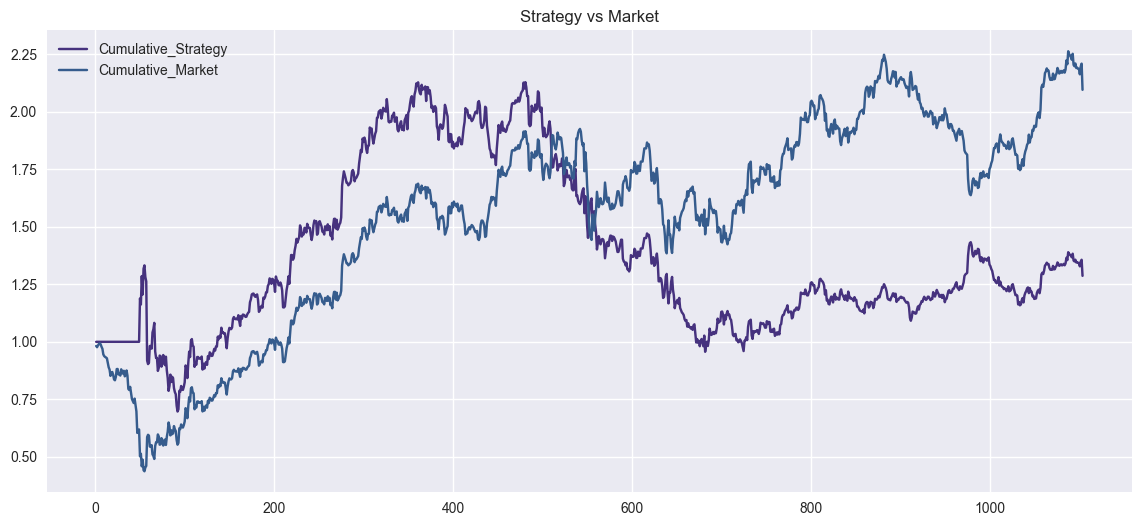

In [11]:
# Simple Moving Average Strategy
df['Signal'] = 0
df['Signal'][df['MA20'] > df['MA50']] = 1
df['Signal'][df['MA20'] < df['MA50']] = -1
df['Strategy_Return'] = df['Signal'].shift(1) * df['Daily_Return']

# Cumulative Returns
df['Cumulative_Strategy'] = (1 + df['Strategy_Return']).cumprod()
df['Cumulative_Market'] = (1 + df['Daily_Return']).cumprod()

df[['Cumulative_Strategy', 'Cumulative_Market']].plot(figsize=(14,6), title="Strategy vs Market")


In [12]:
df.to_csv("Mercedes_Stock_Processed.csv", index=False)
